# Imports

We will use the standard data science and machine learning libraries: numpy, pandas, and scikit-learn. We also use matplotlib and seaborn for visualization.

In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# For ignoring and non-display of warnings
import warnings 
warnings.filterwarnings('ignore')

# For estimations of different statistical models
import statsmodels.api as sm

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1.25)

# For operations related to date and time
from datetime import date

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

# For changing categorical to numerical
from sklearn.preprocessing import LabelEncoder

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# For performing statistical operations
import scipy.stats as stats

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# For standardizing features by remvoing the mean and scaling to unit variance
from sklearn.preprocessing import MinMaxScaler

# Data Cleaning and Formatting

## Load in the Data and Examine

We will be loading our data into a pandas dataframe, one of the most useful data structures for data science. Think of it as a spreadsheet within Python that we can easily manipulate, clean, and visualize. Pandas has many methods to help make the data science/machine learning pipeline as smooth as possible.

In [2]:
# Read in data into a dataframe 
data=pd.read_csv("data.csv")

# Display top of dataframe
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,...,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,...,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,...,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,...,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,...,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,...,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Taking a look at the raw data, we can already see a number of issues we'll have to solve. First of all, there are 89 columns and we don't know what many of them mean! All we know from the problem statement is that we want to predict the number in the Value column. Some of the other column definitions can be reasonably guessed, but others are difficult to understand. In machine learning, this isn't actually a problem, because we let the model decide which features are important. Sometimes we may not even be given column names or told what we are predicting. Nonetheless, I like to understand the problem to the extent possible, and because we also want to interpret the model results, it would be a good idea to have some knowledge of the columns.

After a thorough internet search by the name "FIFA 19 data for machine learning" lead to this webpage https://towardsdatascience.com/exploring-fifa-277f469c8cdc which tells us more about the data.     

While we don't need to study every column, it would be a good idea to at least understand the target we want to predict. Here is the definition for the Overall target which we can also term as rating:     

A sports rating system is a system that analyzes the results of sports competitions to provide ratings for each team or player.

## Data Types

The dataframe.info method is a quick way to assess the data by displaying the data types of each column and the number of non-missing values.

In [3]:
# See the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

Sure enough, there are a number of columns with numbers that have been recorded as object datatypes. These will have to be converted to numerical datatype before we can do any numerical analysis.

In [4]:
# Statistics for each column
data.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

## Missing Values

We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.     
     
Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column. As with many tasks in data science, I did not write this function myself, but rather found it online in a Stack Overflow forum!

In [5]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
missing_values_table(data)

Your selected dataframe has 89 columns.
There are 76 columns that have missing values.


,Missing Values,% of Total Values
Loaned From,16943,93.1
CB,2085,11.5
CM,2085,11.5
RAM,2085,11.5
CAM,2085,11.5
LAM,2085,11.5
RW,2085,11.5
RF,2085,11.5
CF,2085,11.5
LF,2085,11.5


Although we want to be careful to not discard information and should be careful when dropping columns, if a column has a high percentage of missing values, then it probably will not be of much use.     
     
What columns to retain may be a little arbitrary (here is a discussion), but for this project, we will remove any columns with more than 50% missing values. In general, be careful about dropping any information because even if it is not there for all the observations, it may still be useful for predicting the target value.

In [7]:
# Get the columns with > 50% missing
missing_df = missing_values_table(data);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 89 columns.
There are 76 columns that have missing values.
We will remove 1 columns.


In [8]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

The rest of the missing values will have to be imputed (filled-in) using an appropriate strategy before doing machine learning.

## Convert Data to Correct Types

We convert the columns with numbers into numeric data types by replacing the strings which can be interpreted as floats. Then we will convert the columns that contain numeric values into numeric datatypes.

### Value

A player's market value can be defined as “an estimate of the amount of money a club would be willing to pay in order to make an athlete sign a contract, independent of an actual transaction”.     
     
We will convert the value in "Values" column to **float** by **removing the suffixes and currency signs**.

In [9]:
#Function to convert
def value_convert(val):
    suffix = val[-1]
    if suffix == 'M':
        return float(val[1:-1]) * 1000000
    elif suffix == 'K':
        return float(val[1:-1]) * 1000
    else:
        return float(val[1:])

#Applying function to convert
data['Value'] = data['Value'].apply(value_convert)

### Wage

Wage is the amount of money that a team spends on players in exchange for their services to the team and game.     
     
We will convert the value in "Wage" column to **float** by **removing the suffixes and currency signs**.

In [10]:
#Applying function to convert
data['Wage'] = data['Wage'].apply(value_convert)

### Release Clause

It's a clause inserted into a player's contract that permits other clubs to attempt to sign that player.     
     
We will convert the value in "Release Clause" column to **float** by **removing the suffixes and currency signs**.

In [11]:
#Replacing null values
data['Release Clause'].fillna('€0',inplace=True)

#Applying function for conversion
data['Release Clause'] = data['Release Clause'].apply(value_convert)

### Height

Heights of players are given in feet and inches. We will convert them into **cms** and also convert the column to **numerical**.

In [12]:
#Replacing null values
data['Height'].fillna(method='ffill', inplace=True)

#Function to convert
def height_convert(height):
    return round((float(height[0]+'.'+height[2:])*30.48),2)

#Applying function for conversion
data['Height'] = data['Height'].apply(height_convert)

### Weight

Weights of players are given in lbs. We will convert them into **numerical**.

In [13]:
#Replacing null values
data['Weight'].fillna(method='ffill',inplace=True)

#Function to convert
def weight_convert(weight):
    return float(weight[:-3])

#Applying function for conversion
data['Weight'] = data['Weight'].apply(weight_convert)

### Work Rate

We will split the attacking and defending work rate into **two separate features**.

In [14]:
#Replacing null values
data['Work Rate'].fillna(method='ffill',inplace=True)

#Function to convert attacking work rate
def work_rate_attacking_convert(work_rate):
    rate = work_rate.split('/')[0]
    return rate

#Function to convert attacking work rate
def work_rate_defending_convert(work_rate):
    rate = work_rate.split('/')[1][1:]
    return rate

#Applying function for conversion
data['Attacking_Work_Rate'] = data['Work Rate'].apply(work_rate_attacking_convert)
data['Defending_Work_Rate'] = data['Work Rate'].apply(work_rate_defending_convert)

#Dropping the Work Rate column
data.drop('Work Rate',axis=1,inplace=True)

### Contract Valid Until

The date till which a player's contract stands valid in his/her current club. We will convert this feature from date to **number of years**.

In [15]:
#Replacing null values
data['Contract Valid Until'].fillna('0',inplace=True)

#Function to return number of years between two given dates
def numOfYears(date1,date2):
    return round((((date2-date1).days)/365),2)

#Convert month to number
def month_in_number(month):
    month_number = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
    return month_number.get(month)

#Coversion of contract to years
for i in range(data['Contract Valid Until'].shape[0]):
    contract = data['Contract Valid Until'][i]
    if contract[0]=='2':
        years = int(contract)-2018
        data['Contract Valid Until'][i] = years
    elif contract=='0':
        data['Contract Valid Until'][i] = 0
    else:
        year = int(data['Contract Valid Until'][i].split(',')[1][1:])
        month = month_in_number(data['Contract Valid Until'][i].split(',')[0].split()[0])
        day = int(data['Contract Valid Until'][i].split(',')[0].split()[1])
        date1 = date(2018,12,31)
        date2 = date(year,month,day)
        data['Contract Valid Until'][i] = numOfYears(date1,date2)

#Convert type to numeric
data['Contract Valid Until'] = pd.to_numeric(data['Contract Valid Until'])

### Joined

The date from which the player has joined in his/her current club. We will convert this feature from date to **number of years**.

In [16]:
#Replacing null values
data['Joined'].fillna('0',inplace=True)

#Coversion of joined to years
for i in range(data['Joined'].shape[0]):
    joined = data['Joined'][i]
    if joined=='0':
        data['Joined'][i] = 0
    else:
        year = int(data['Joined'][i].split(',')[1][1:])
        month = month_in_number(data['Joined'][i].split(',')[0].split()[0])
        day = int(data['Joined'][i].split(',')[0].split()[1])
        date1 = date(year,month,day)
        date2 = date(2018,12,31)
        data['Joined'][i] = numOfYears(date1,date2)

#Convert type to numeric
data['Joined'] = pd.to_numeric(data['Joined'])

### Different positional statistics

The ratings of a player out of 100 when they play in different positions along with an expected growth. We will convert this feature to **numerical** by **adding the current rating with expected growth**.

Different positions:

Left Striker (LS)     
Striker (ST)     
Right Striker (RS)     
Left Wing (LW)     
Left Forward (LF)     
Centre Forward (CF)     
Right Forward (RF)     
Right Wing (RW)     
Left Attacking Midfielder (LAM)     
Centre Attacking Midfielder (CAM)     
Right Attacking Midfielder (RAM)     
Left Midfielder (LM)     
Left Centre Midfielder (LCM)     
Centre Midfielder (CM)     
Right Centre Midfielder (RCM)     
Right Midfielder (RM)     
Left Wing Back (LWB)     
Left Defending Midfielder (LDM)     
Centre Defending Midfielder (CDM)     
Right Defending Midfielder (RDM)     
Right Wing Back (RWB)     
Left Back (LB)     
Left Centre Back (LCB)     
Centre Back (CB)     
Right Centre Back (RCB)     
Right Back (RB)     

In [17]:
#Fetching all column names related to positions
cols = data.iloc[:,26:52].columns

#Replacing null values
for col in cols:
    data[col].fillna('0+0',inplace=True)

#Function to convert
def convert(val):
    li = val.split('+')
    return (int(li[0])+int(li[1]))

#Applying function for conversion
for col in cols:
    data[col] = data[col].apply(convert)

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an open-ended process where we make plots and calculate statistics in order to explore our data. The purpose is to to find anomalies, patterns, trends, or relationships. These may be interesting by themselves (for example finding a correlation between two variables) or they can be used to inform modeling decisions such as which features to use. In short, the goal of EDA is to determine what our data can tell us! EDA generally starts out with a high-level overview, and then narrows in to specific parts of the dataset once as we find interesting areas to examine.

To begin the EDA, we will focus on a single variable, the Overall, because this is the target for our machine learning models.

## Univariate Analysis

### Overall

The overall ratings of a player out of 100.

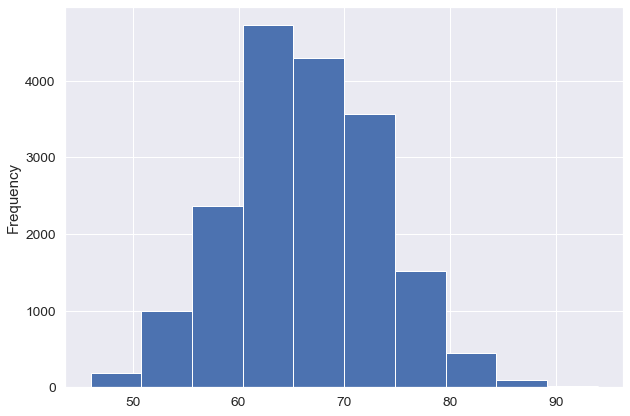

In [18]:
plt.figure(figsize=(10,7))
data['Overall'].plot(kind='hist')
plt.show()

Inferences:

* The distribution of the target variable 'Overall' is **normal** with a **mean of 66.24** and **standard deviation of 6.91**     
* Most of the players are between an overall of **60 to 75**.

### Age

Age of a player.

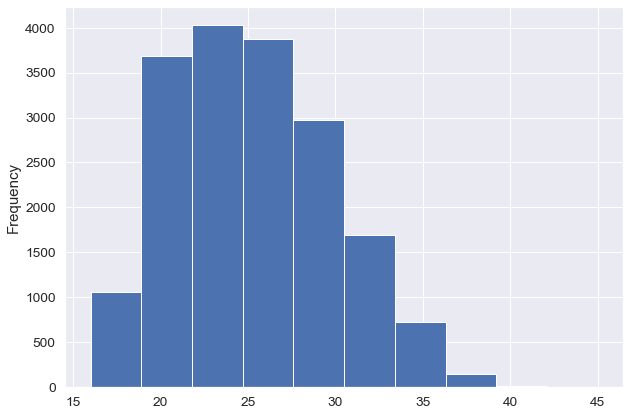

In [19]:
plt.figure(figsize=(10,7))
data['Age'].plot(kind='hist')
plt.show()

Inferences:

* 'Age' follows a **normal distribution** with a slight **skewness towards right (0.39)** having a **mean of 25.12** and **standard deviation of 4.67**.
* Most of the players fall in the age range of **20 to 30**.

### Nationality

The country to which a player belongs.

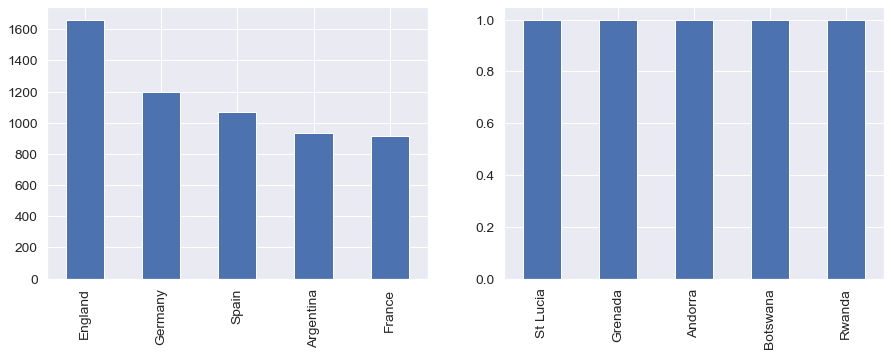

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
data['Nationality'].value_counts().head(5).plot(x='Nationality',kind='bar',ax=ax[0])
data['Nationality'].value_counts().tail(5).plot(x='Nationality',kind='bar',ax=ax[1])
plt.show()

Inferences:

* **England** has the highest number of players (**1662**).
* **Ethiopia**, **Andorra**, **New Caledonia**, **Mauritius** and **Oman** has the lowest number of players (**1**).

### Potential

Each individual in FIFA 19 career mode has a pre-programmed player potential which determines how fast their attributes should grow and when they should stop. You can think of it as a player's predicted or peak overall rating. This is how we know which players are going to be wonderkids.

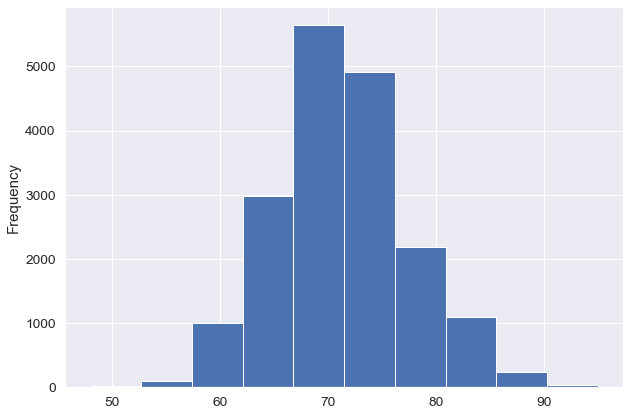

In [21]:
plt.figure(figsize=(10,7))
data['Potential'].plot(kind='hist')
plt.show()

Inferences:

* 'Potential' follows a **normal distribution** with a mean of **71.31** and standard deviation of **6.14**.
* Most of the players fall in the potential range of **65 to 80**.

### Club

The club to which they belong

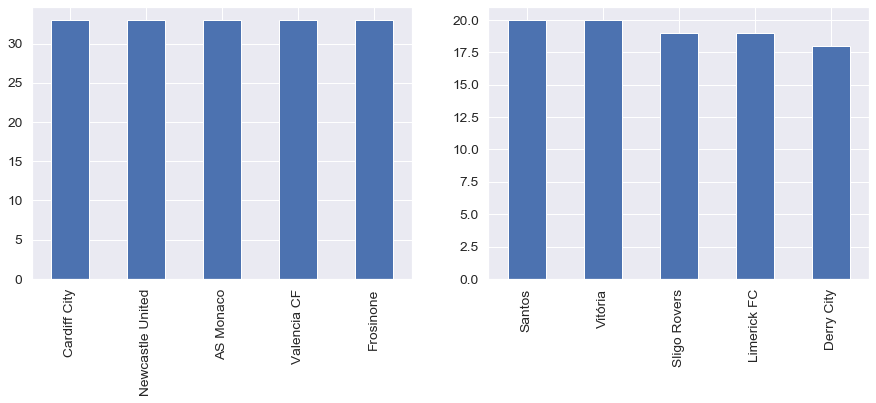

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
data['Club'].value_counts().head(5).plot(x='Club',kind='bar',ax=ax[0])
data['Club'].value_counts().tail(5).plot(x='Club',kind='bar',ax=ax[1])
plt.show()

Inferences:

* **Frosinone**, **RC Celta**, **Valencia CF**, **Tottenham Hotspur** and **Fortuna Düsseldorf** has the highest number of players (**33**).
* **Derry City** has the lowest number of players (**18**).

### Preferred Foot

The preferred or stronger foot of the player.

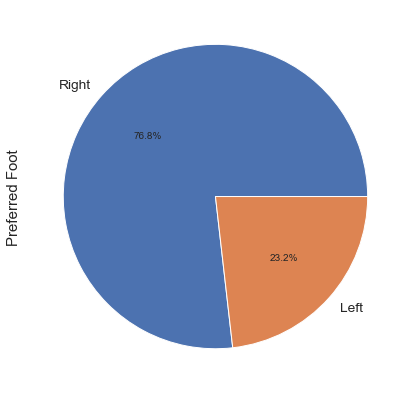

In [23]:
plt.figure(figsize=(10,7))
data['Preferred Foot'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Inferences:

* **Left footed** players constitute **23.1%** of total players whereas the rest **76.9% are right footed**.
* Approximately **3/4th of total players are right footed**.

### International Reputation

International Reputation, also known as International Recognition, is an attribute that affects the player's rating according to his club's local and international prestige. It is based essentially on the popularity, history and results of them both.

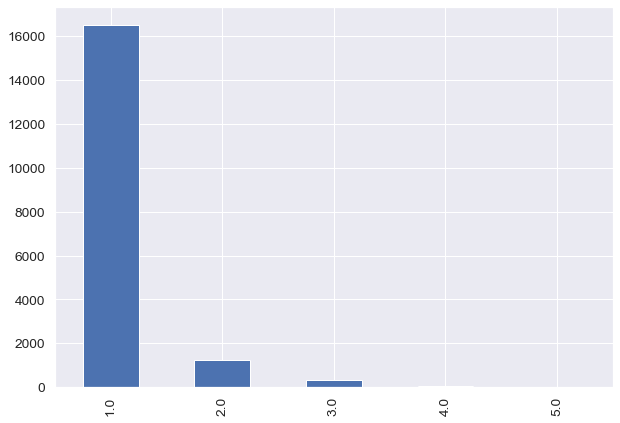

In [24]:
plt.figure(figsize=(10,7))
data['International Reputation'].value_counts().plot.bar()
plt.show()

Inferences:

* Most players are having an international reputation of 1 (**16532**).
* The least number of players belong to 5 (**6**).

### Weak Foot

Weak Foot is shown as star rating - where a 5-star rating is the highest. A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the shot power and ball control for the other foot of that player than his preferred foot's.

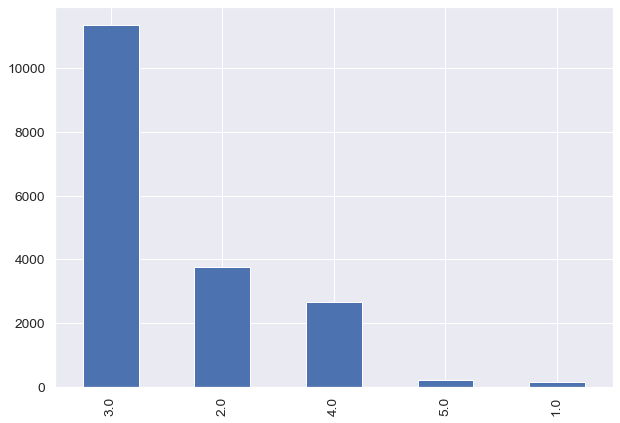

In [25]:
plt.figure(figsize=(10,7))
data['Weak Foot'].value_counts().plot.bar()
plt.show()

Inferences:

* Most players have a median rating of 3 (**11349**).     
* A 1-star rating has the least number of players (**158**).

### Skill moves

The Star Skill Moves measures the ability that a player has to perform technical moves. To all skill moves, it is assigned a number between 1 (least complex) and 5 (most complex). Players with higher skills are able to perform more complex moves.

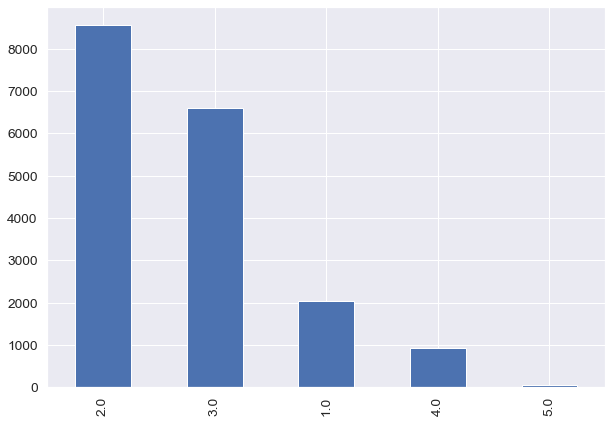

In [26]:
plt.figure(figsize=(10,7))
data['Skill Moves'].value_counts().plot.bar()
plt.show()

Inferences:

* Most players perform a less-complex skill move which is rated as 2 (**8565**).     
* The least players can perform the most-complex skill move which is rated as 5 (**51**).

### Body Type

The body type of a player signifies the body shape.

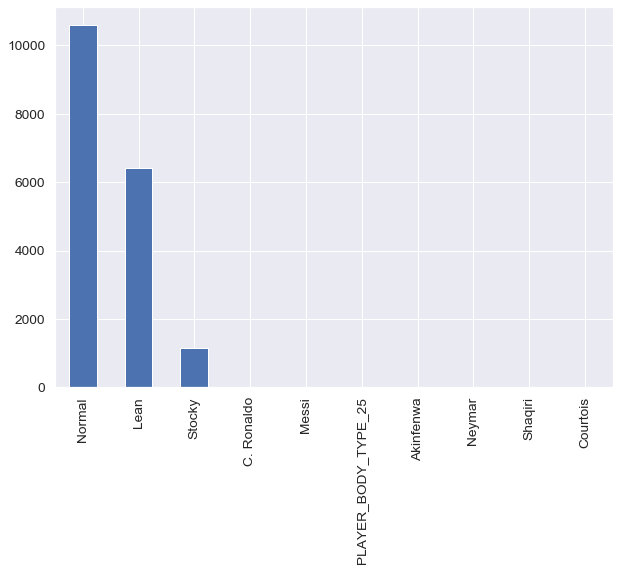

In [27]:
plt.figure(figsize=(10,7))
data['Body Type'].value_counts().plot.bar()
plt.show()

Inferences:

* Most players have a 'Normal' body type (**10595**).
* Least players have a 'Stocky' body type (**1140**).
* Some of the players like **C. Ronaldo**, **Akinfenwa**, **Courtois**, **Messi**, **Neymar**, **Shaqiri** and **M. Salah** (having PLAYER_BODY_TYPE_25) have an unique body type not belonging to the general categories.

### Real Face

This is a feature which states whether the graphical representation of a player in the game has a face in the real world or not.

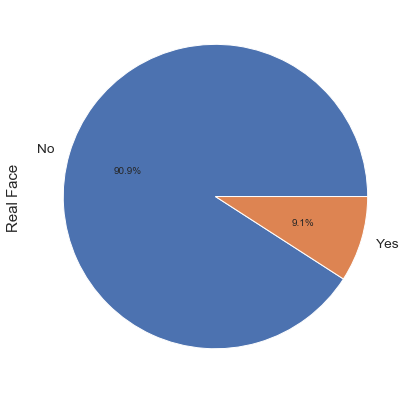

In [28]:
plt.figure(figsize=(10,7))
data['Real Face'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Inferences:

* **90.9%** of total players in the game does not have a real face whereas the rest **9.1%** have otherwise.

### Position

The position on the pitch where the player usually plays.

http://logfact.com/football-soccer-field-player-positions-abbreviations/

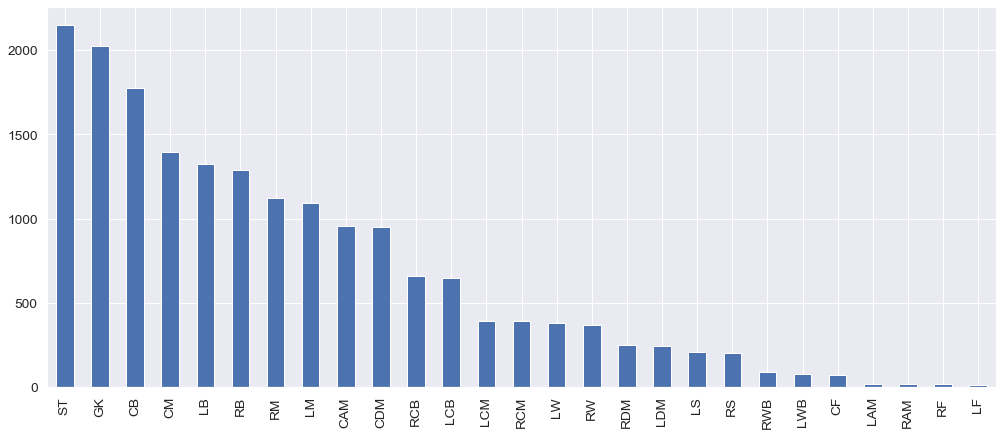

In [29]:
plt.figure(figsize=(17,7))
data['Position'].value_counts().plot.bar()
plt.show()

Inferences:

* Strikers are the most in number (**2152**).
* Left Forwards are the least in number (**15**).

### Jersey Number

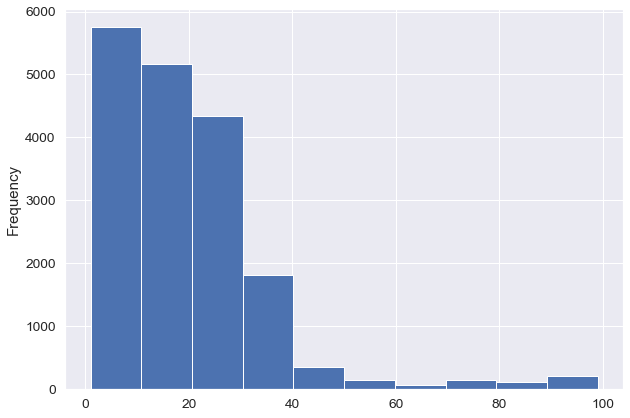

In [30]:
plt.figure(figsize=(10,7))
data['Jersey Number'].plot(kind='hist')
plt.show()

Inferences:

* Most players prefer a jersey number between **1 to 30**.

### Joined

Number of years since a player has joined his/her current club.

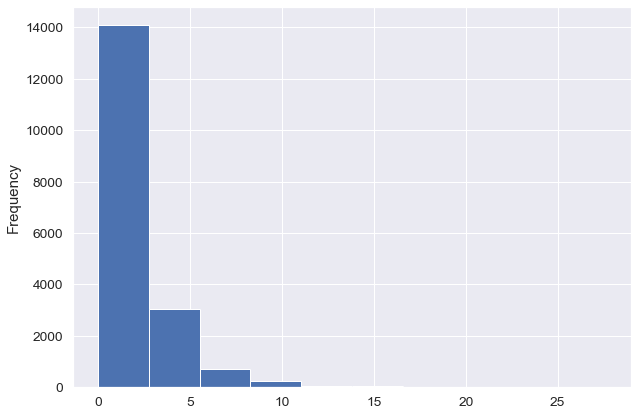

In [31]:
plt.figure(figsize=(10,7))
data['Joined'].plot(kind='hist')
plt.show()

Inferences:

* Most players have a year spanning from **0 to 2.5 years**. 
* Very few players have stayed at their current club beyond **5 years**.

### Contract Valid Until

The number of years a player's contract stands valid at their current club. 

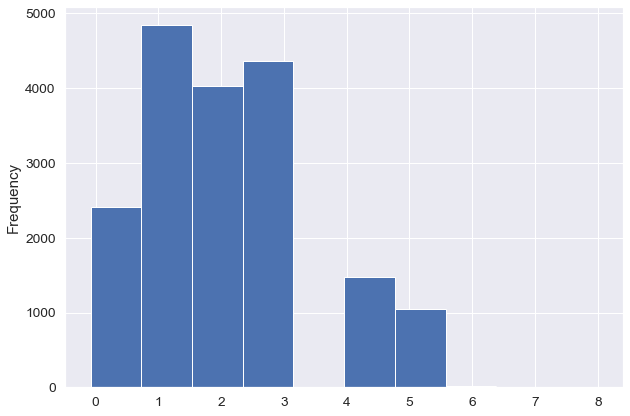

In [32]:
plt.figure(figsize=(10,7))
data['Contract Valid Until'].plot(kind='hist')
plt.show()

Inferences:

* Most players have their contracts valid for **0 to 3 years**.
* Very few players have their contracts valid for **4 to 5 years**.

### Height

Height of a player in cms

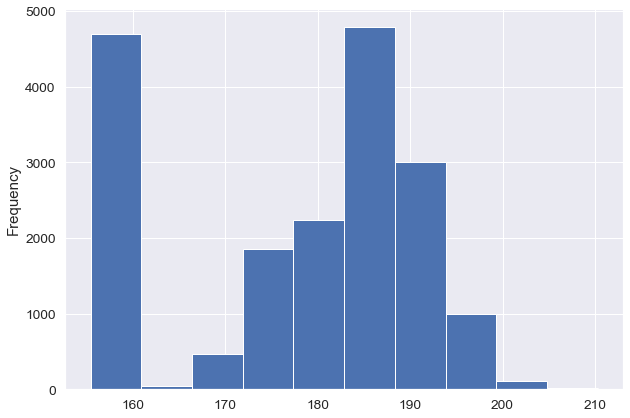

In [33]:
plt.figure(figsize=(10,7))
data['Height'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a height of **155cms and 185cms** approx.
* Very few players are having a height of **160cms and 200 cms** approx.

### Weight

Weight of a player in lbs

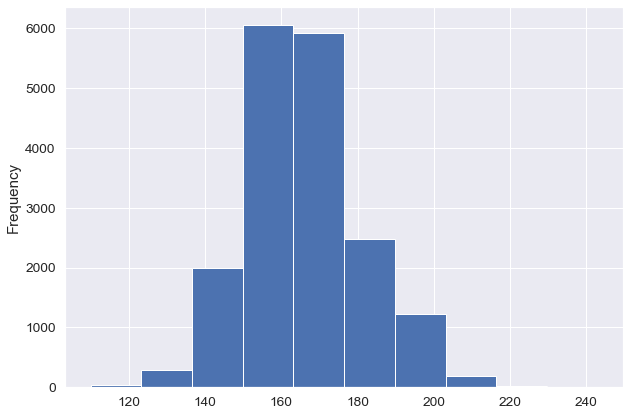

In [34]:
plt.figure(figsize=(10,7))
data['Weight'].plot(kind='hist')
plt.show()

Inferences:

* Weight follows a normal distribution with a **mean of 165.96** and **standard deviation of 15.579**
* Most players are having a weight in the range of **160 to 170 lbs**.

### Attacking Work Rate

The Work Rate is defined for Attacking (Attacking Work Rate - Abbreviated as AWR) and rated between low, medium and high, which defines how a player puts effort to participates in attacks even when they are out of position.

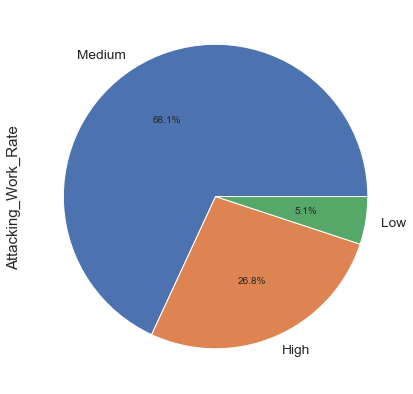

In [35]:
plt.figure(figsize=(10,7))
data['Attacking_Work_Rate'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Inferences:

* Most players (**68.1%**) have a medium attacking work rate.
* Least players (**5.1%**) have a low attackking work rate.

### Defending Work Rate

The Work Rate is defined for Defensive (Defensive Work Rate - Abbreviated as DWR) and rated between low, medium and high, which defines how a player puts effort to participates in defenses even when they are out of position.

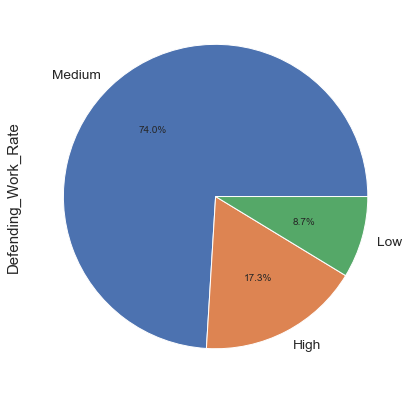

In [36]:
plt.figure(figsize=(10,7))
data['Defending_Work_Rate'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

Inferences:

* Most players (**74%**) have a  medium defending work rate.
* Least players (**8.7%**) have a low defending work rate.

### Different positional statistics

'LS', 'ST' and 'RS' are having same values.     
'LW' and 'RW' are having same values.     
'LF', 'CF' and 'RF' are having same values.     
'LAM', 'CAM' and 'RAM' are having same values.     
'LM' and 'RM' are having same values.     
'LCM', 'CM' and 'RCM' having same values.     
'LWB' and 'RWB' are having same values.     
'LDM', 'CDM' and 'RDM' are having same values.     
'LB' and 'RB' are having same values.     
'LCB', 'CB' and 'RCB' are having same values.

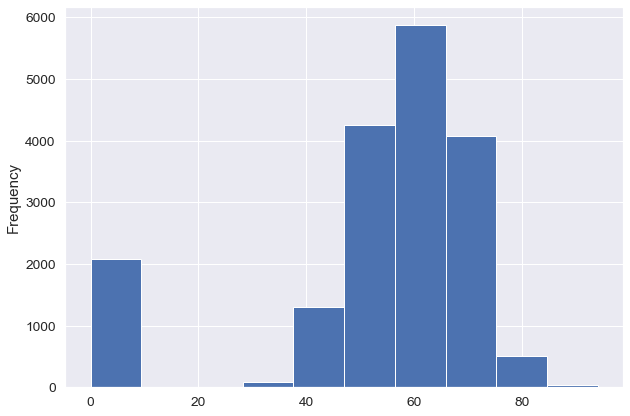

In [37]:
plt.figure(figsize=(10,7))
data['LS'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional striker rating between **50 to 70**.
* Very few players are having a positional striker rating of **30, 80 and 90**.

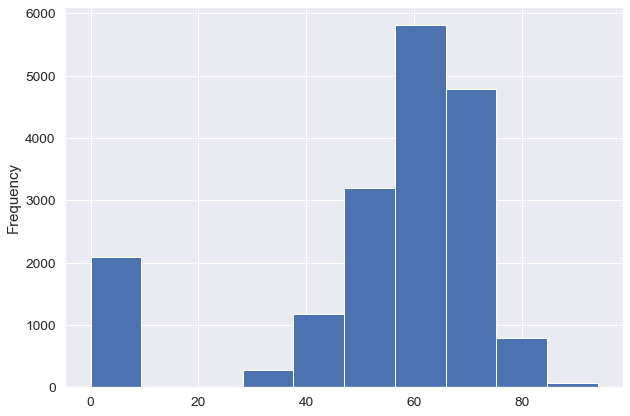

In [38]:
plt.figure(figsize=(10,7))
data['LW'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional winger rating between **60 to 70**.
* Very few players are having a positional winger rating of **30 and 90**.

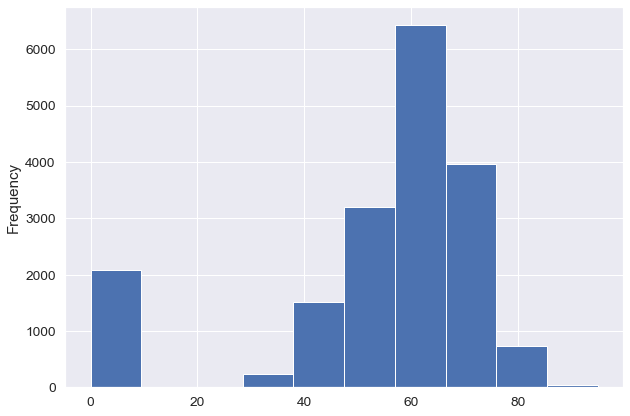

In [39]:
plt.figure(figsize=(10,7))
data['LF'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional forward rating between **60 to 70**.
* Very few players are having a positional forward rating of **30 and 90**.

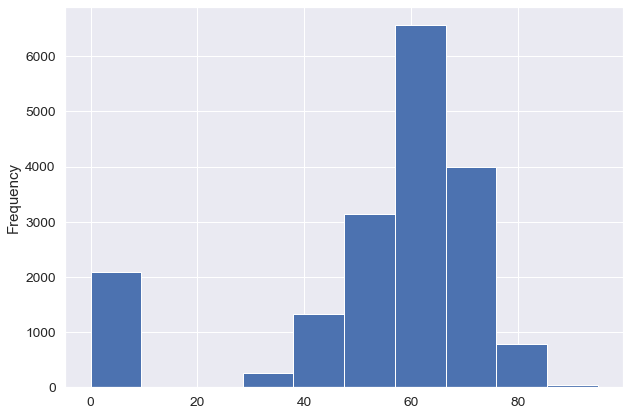

In [40]:
plt.figure(figsize=(10,7))
data['LAM'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional attacking midfielder rating between **60 to 70**.
* Very few players are having a positional attacking midfielder rating of **30 and 90**.

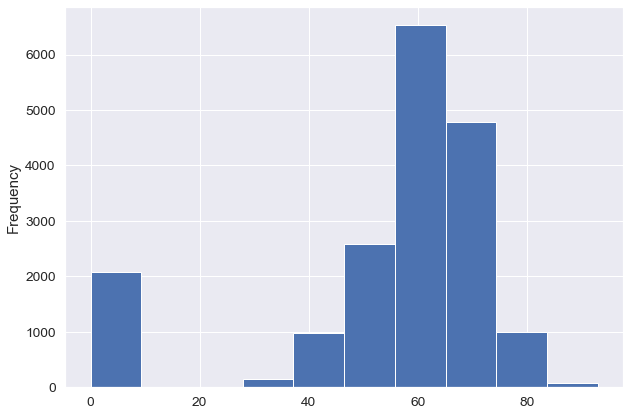

In [41]:
plt.figure(figsize=(10,7))
data['LM'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional side midfielder rating between **60 to 70**.
* Very few players are having a positional side midfielder rating of **30 and 90**.

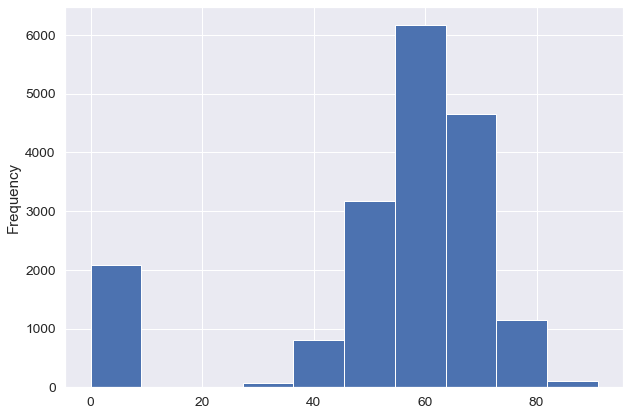

In [42]:
plt.figure(figsize=(10,7))
data['LCM'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional centre midfielder rating between **60 to 70**.
* Very few players are having a positional centre midfielder rating of **30 and 90**.

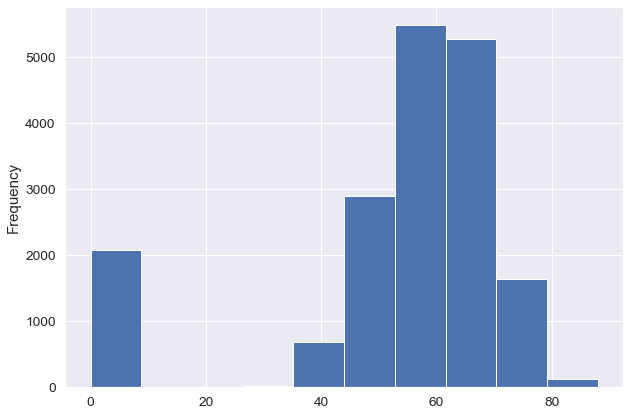

In [43]:
plt.figure(figsize=(10,7))
data['LWB'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional wing back rating between **60 to 70**.
* Very few players are having a positional wing back rating of **40 and 90**.

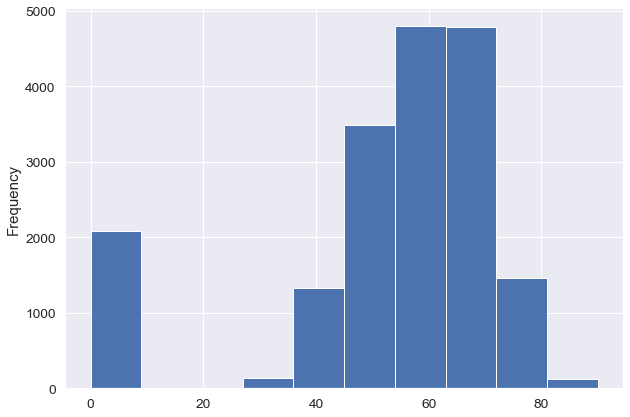

In [44]:
plt.figure(figsize=(10,7))
data['LDM'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional defending midfielder rating between **60 to 70**.
* Very few players are having a positional wing back rating of **30 and 90**.

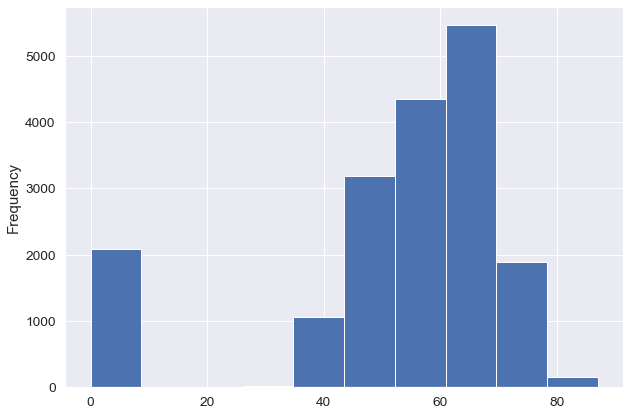

In [45]:
plt.figure(figsize=(10,7))
data['LB'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional side midfielder rating between **60 to 70**.
* Very few players are having a positional side midfielder rating of **40 and 90**.

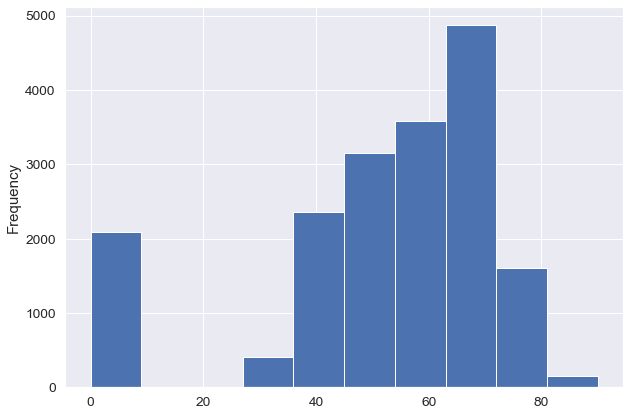

In [46]:
plt.figure(figsize=(10,7))
data['LCB'].plot(kind='hist')
plt.show()

Inferences:

* Most players are having a positional centre defender rating between **50 to 70**.
* Very few players are having a positional centre defender rating of **30 and 90**.

### Attributes with respect to top 5 players

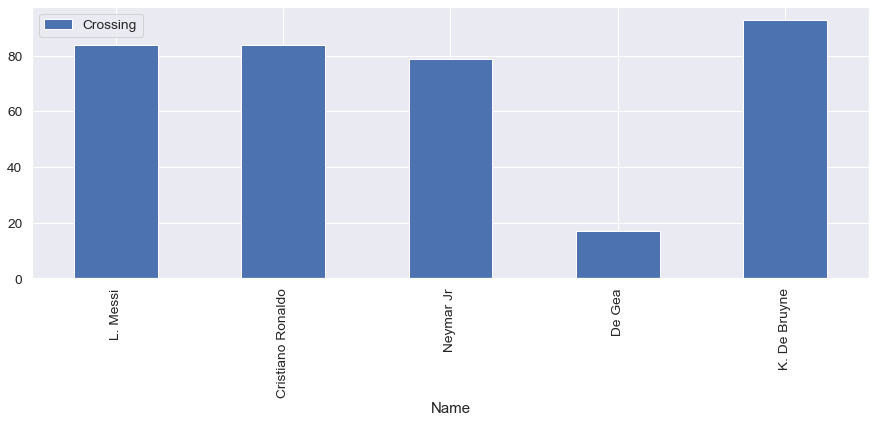

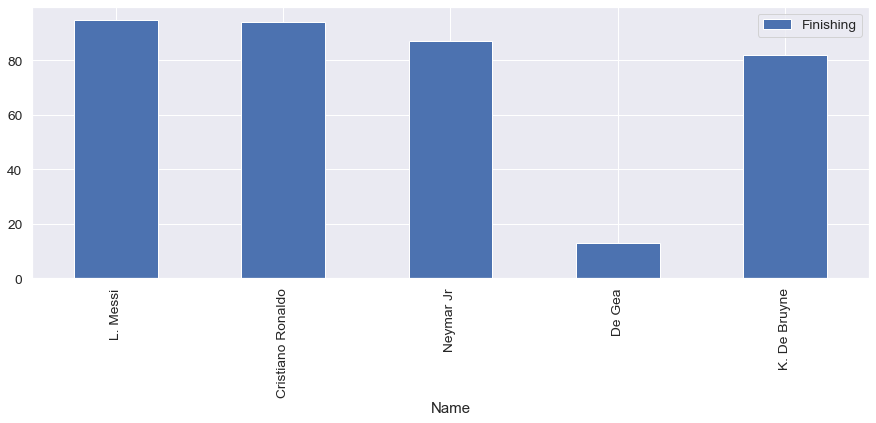

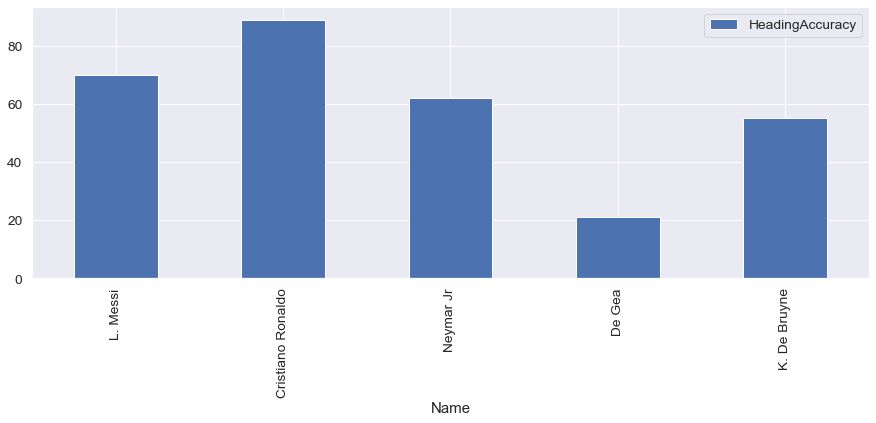

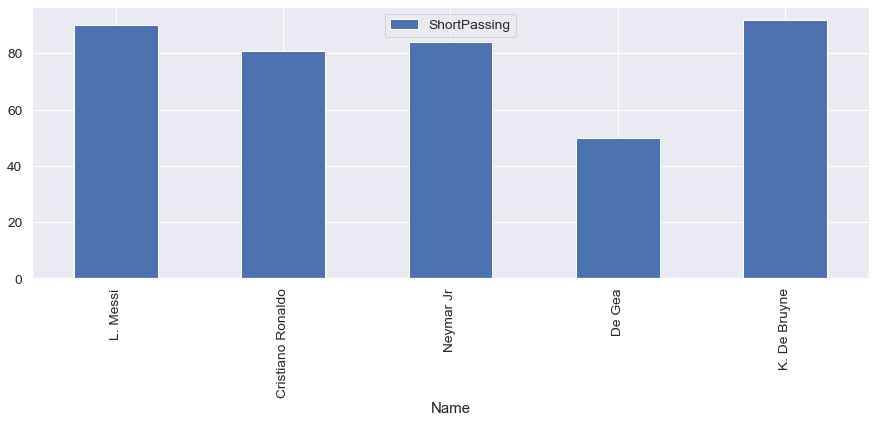

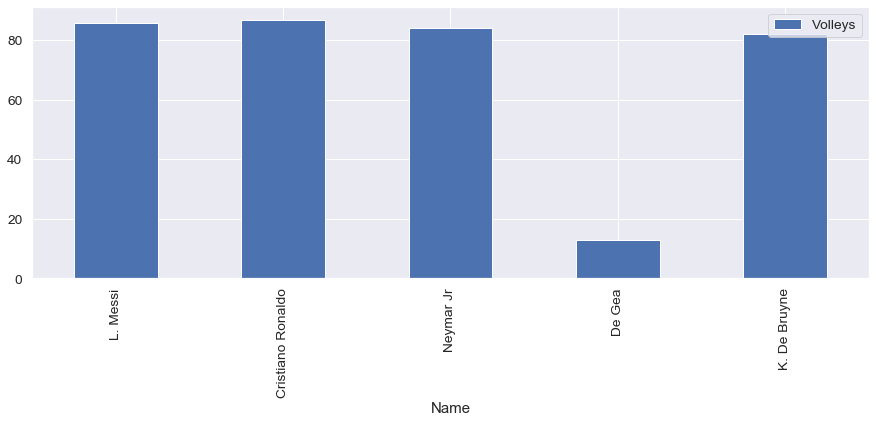

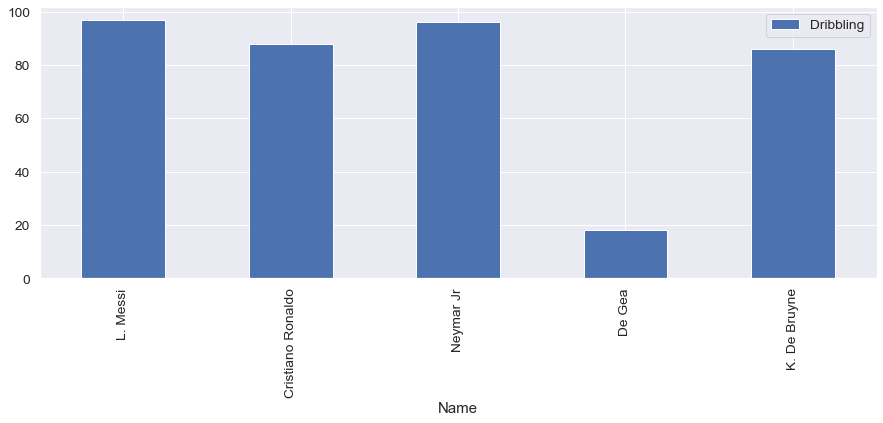

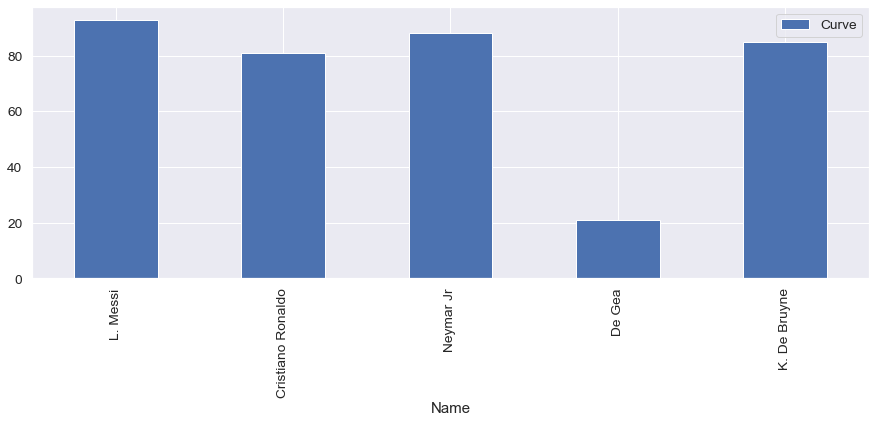

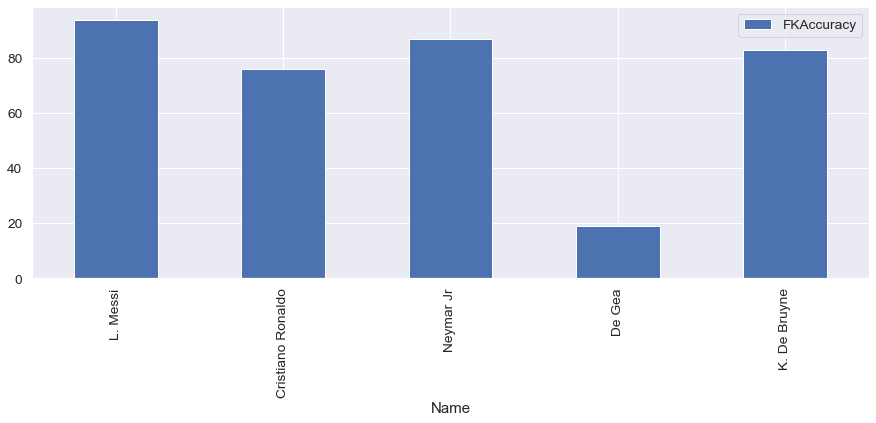

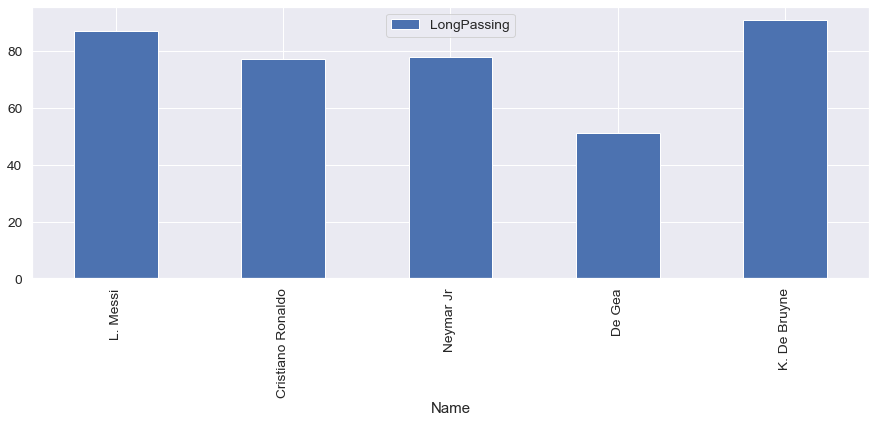

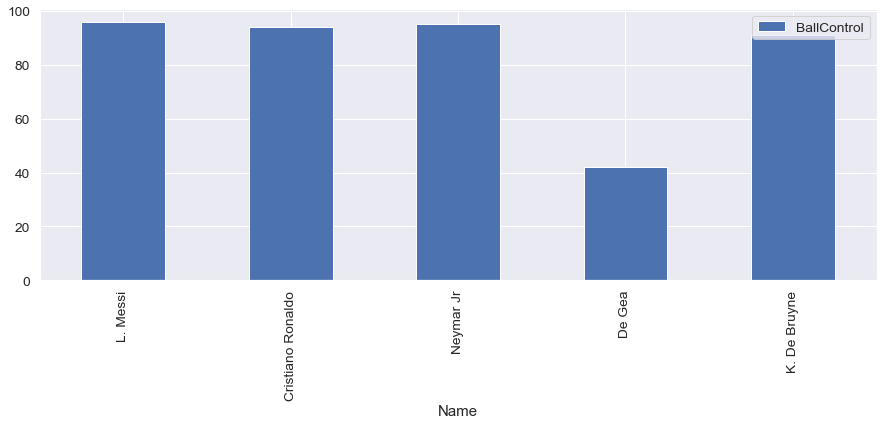

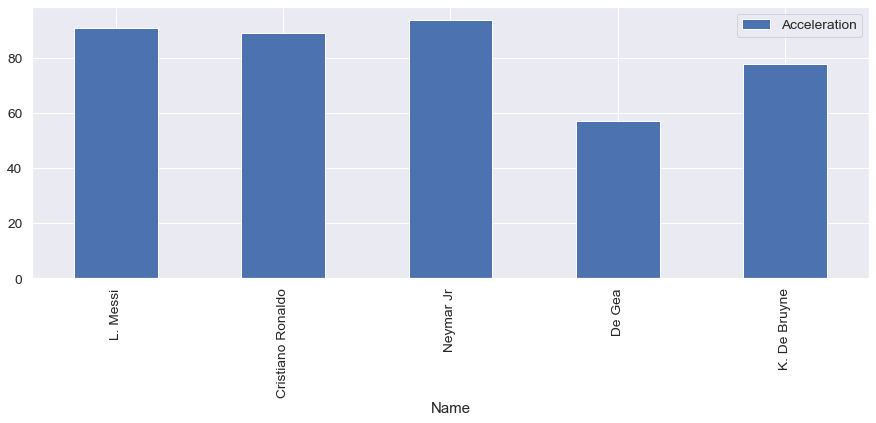

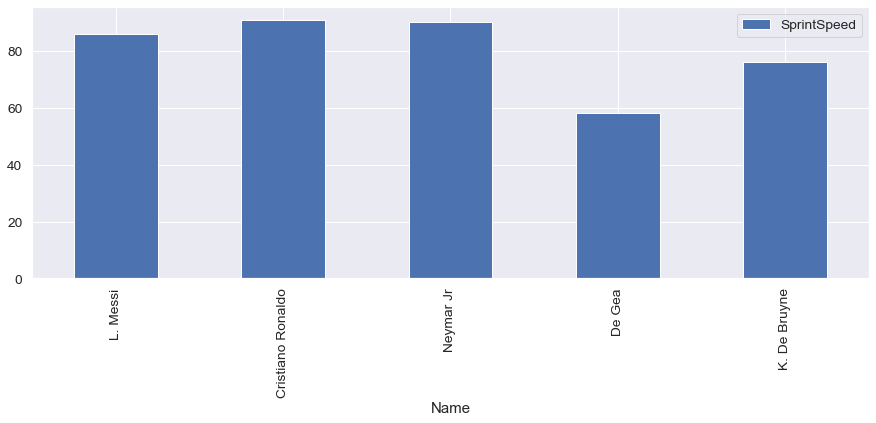

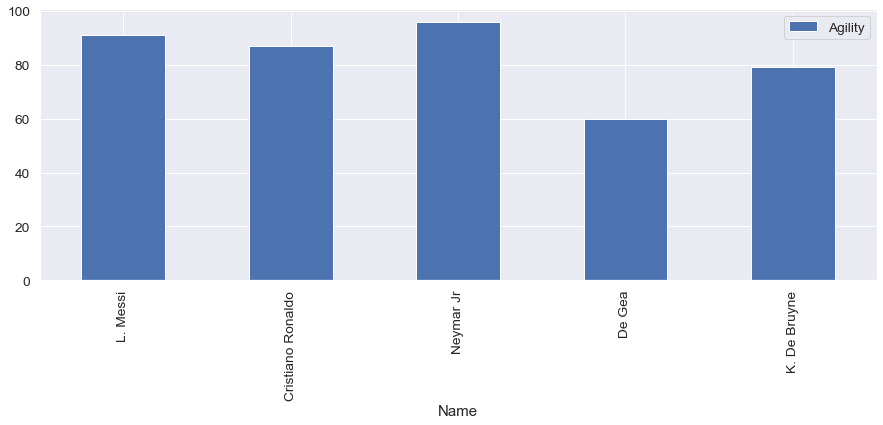

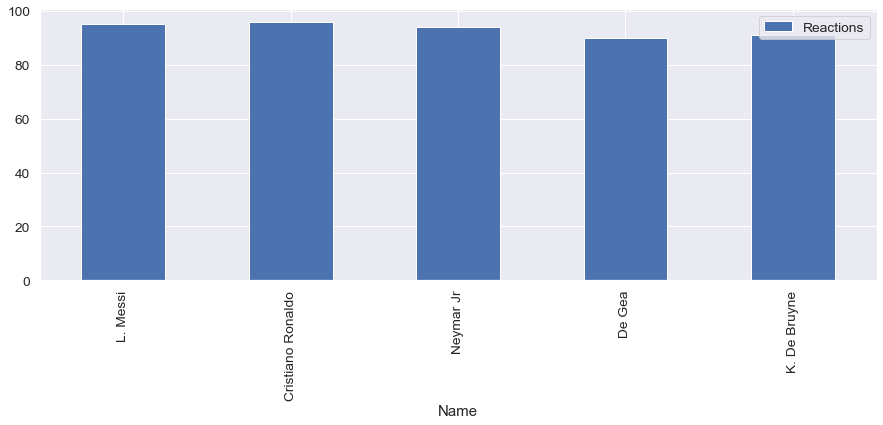

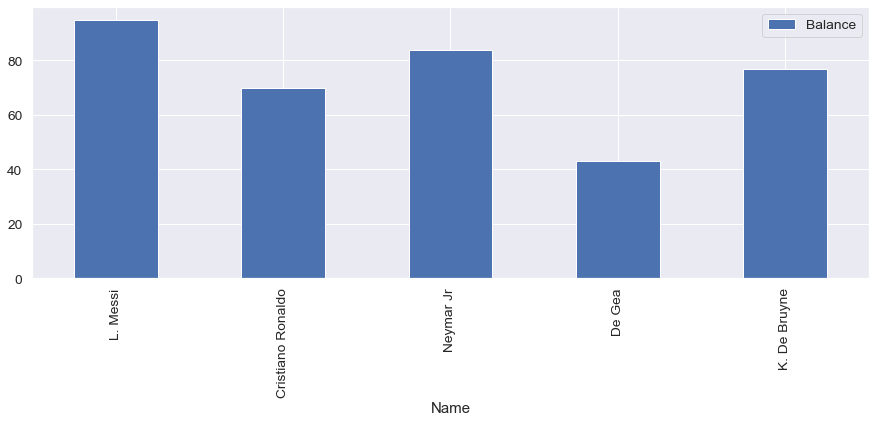

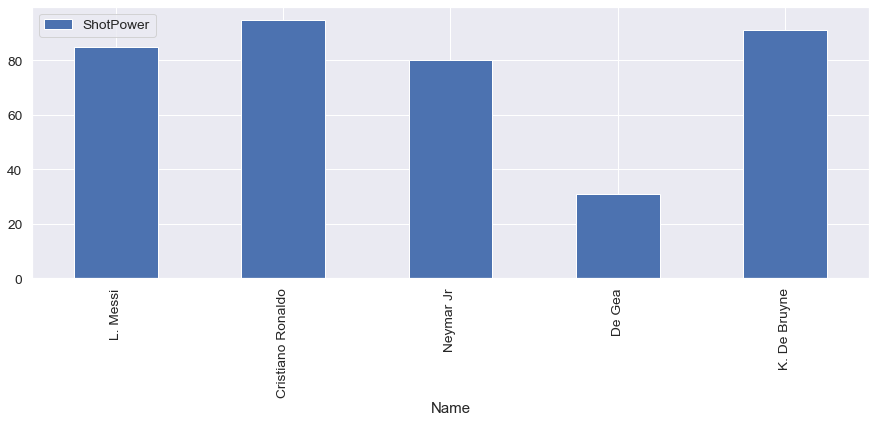

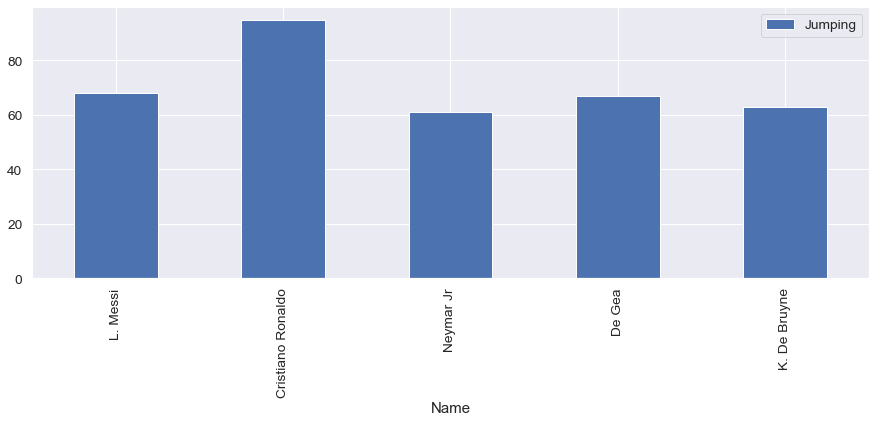

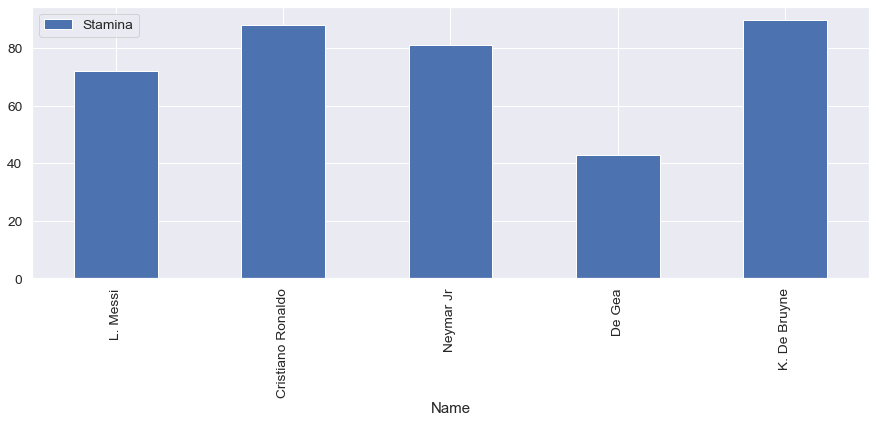

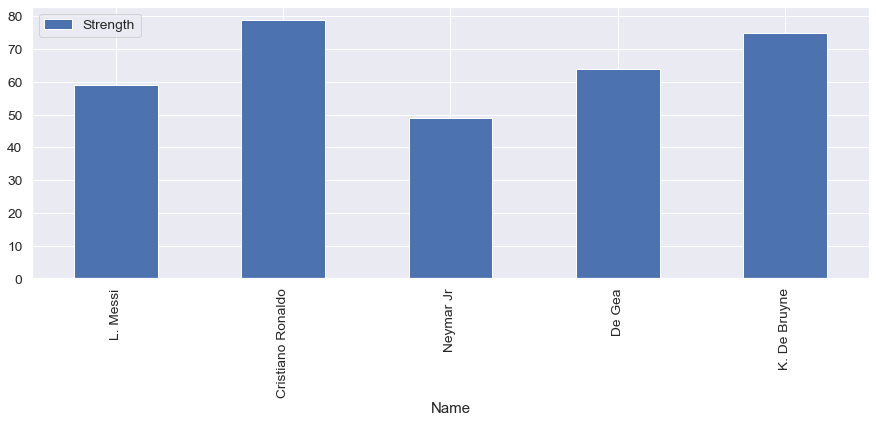

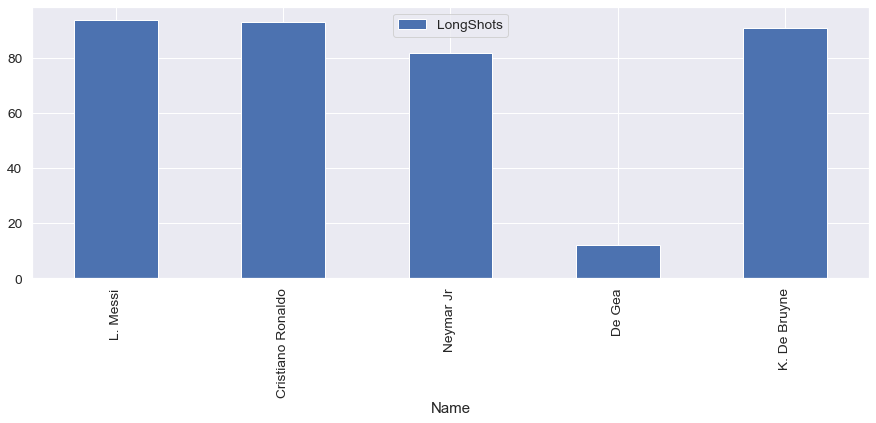

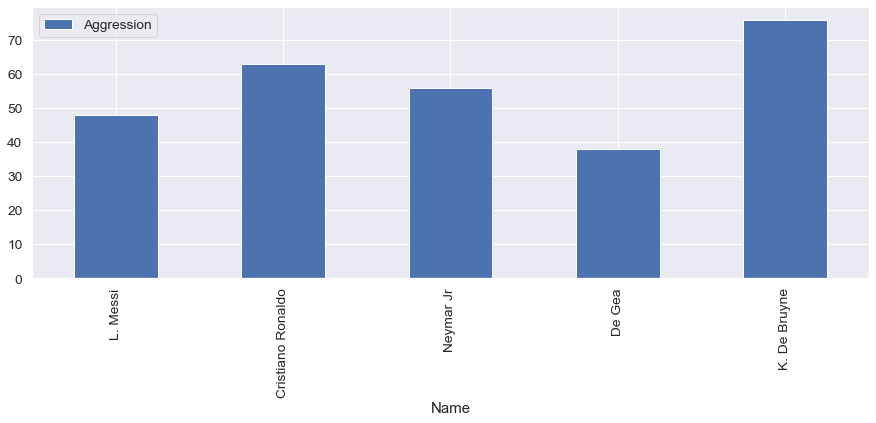

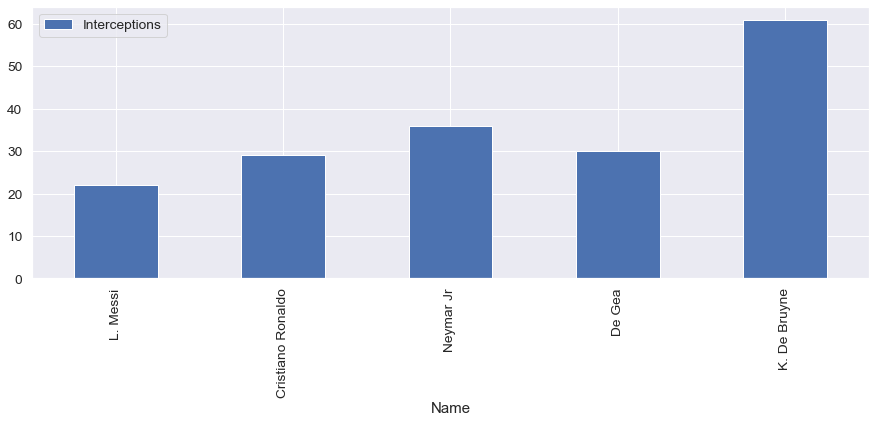

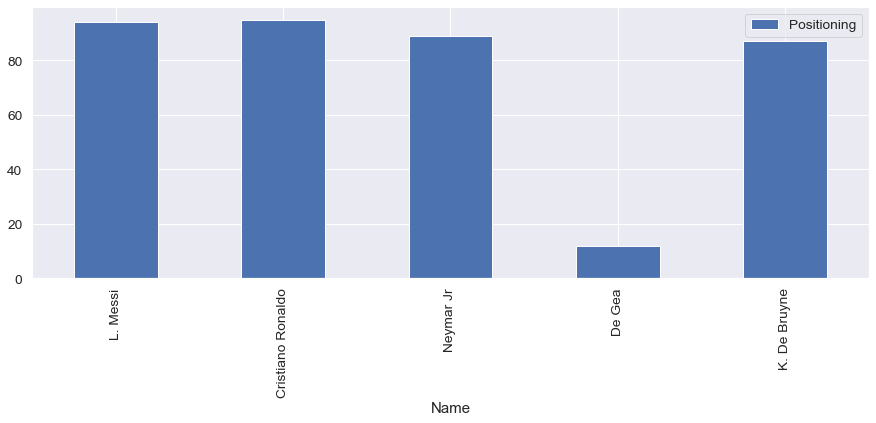

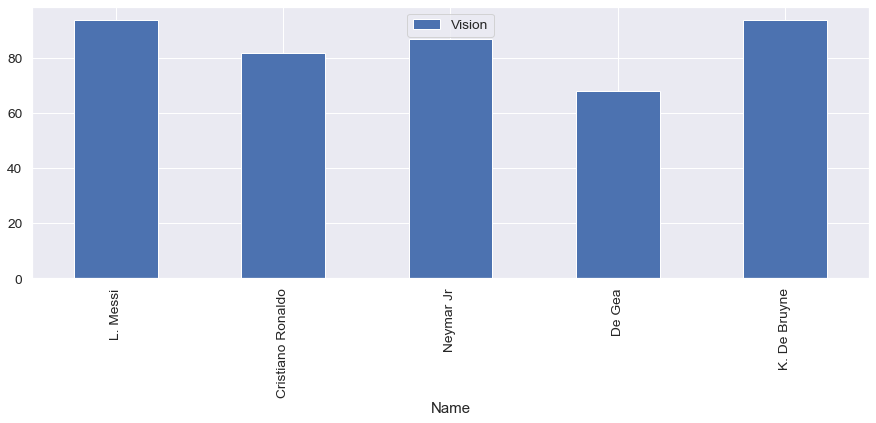

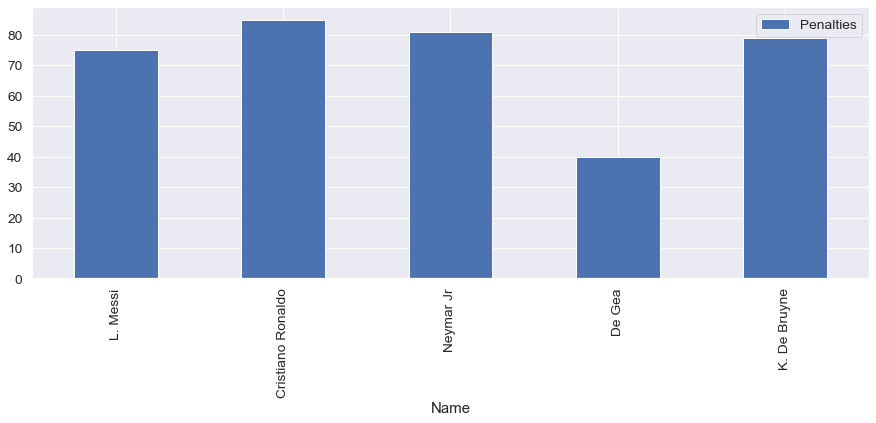

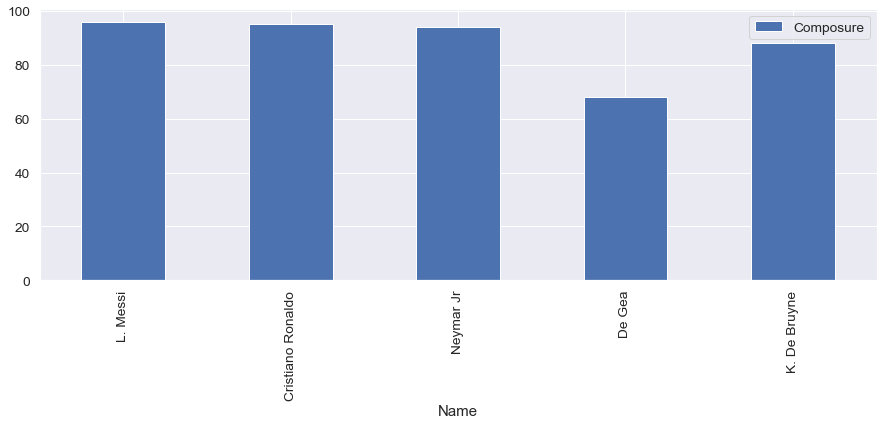

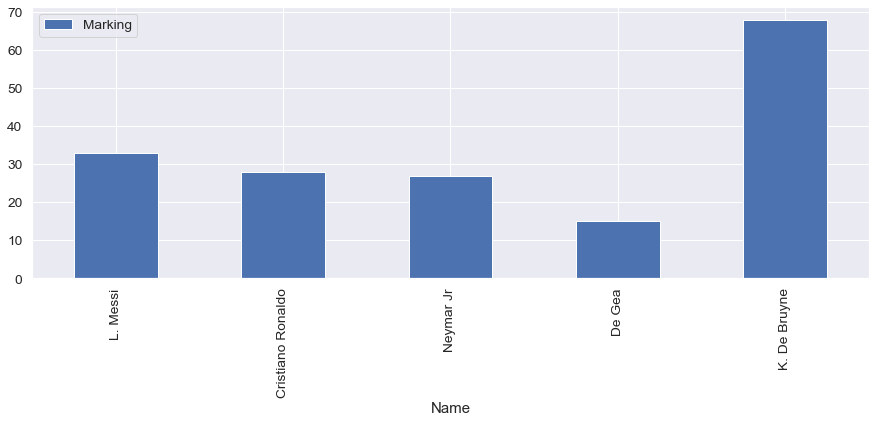

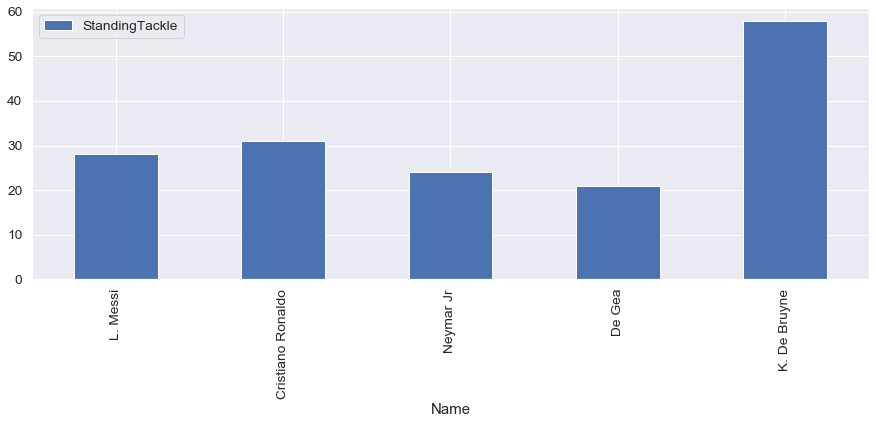

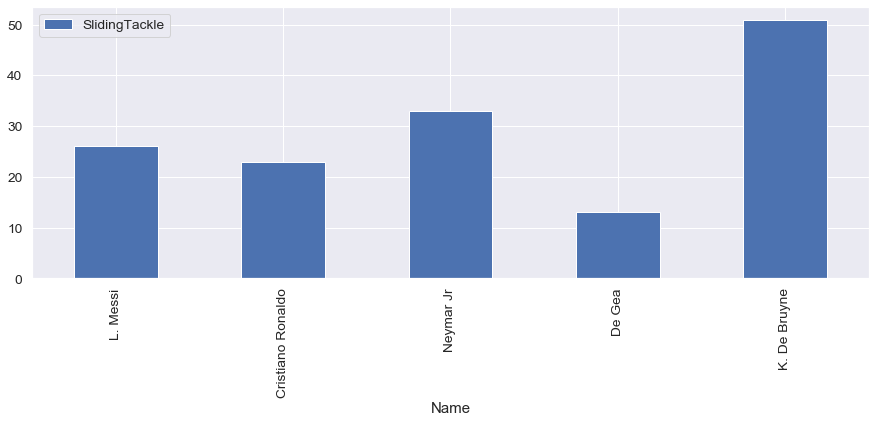

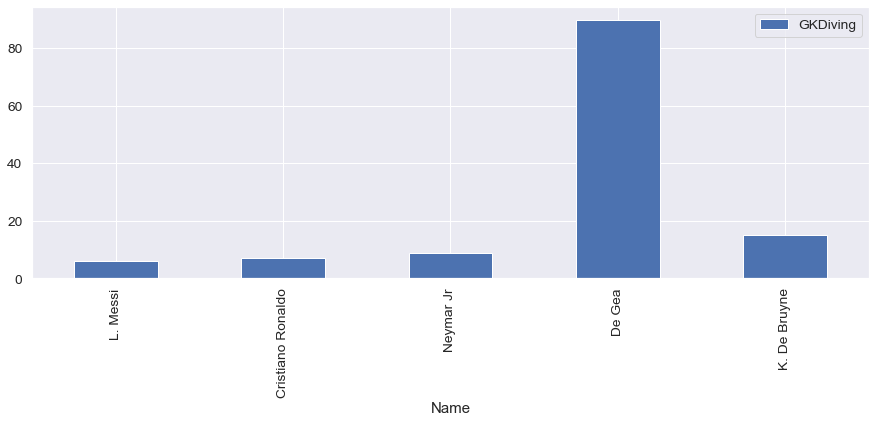

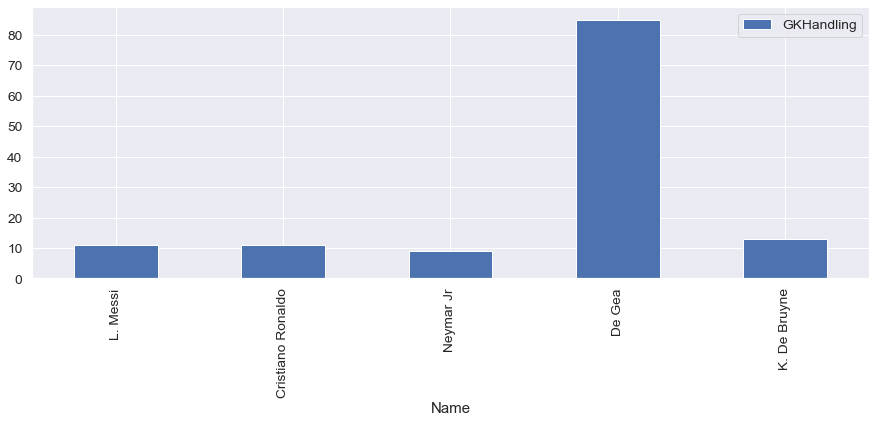

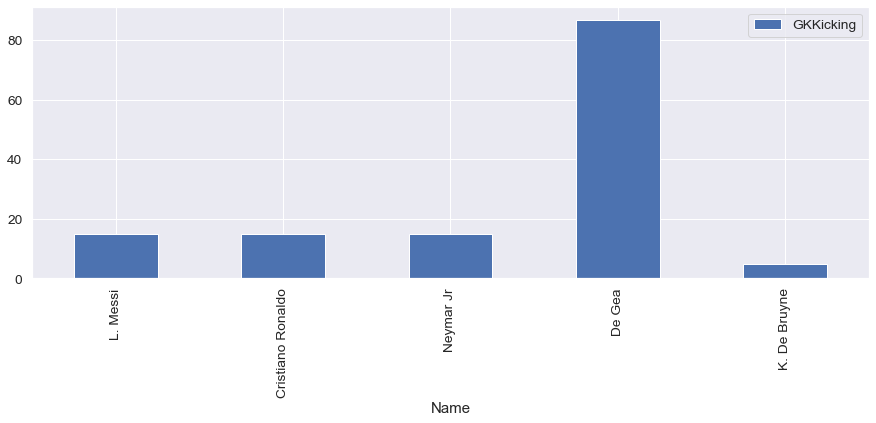

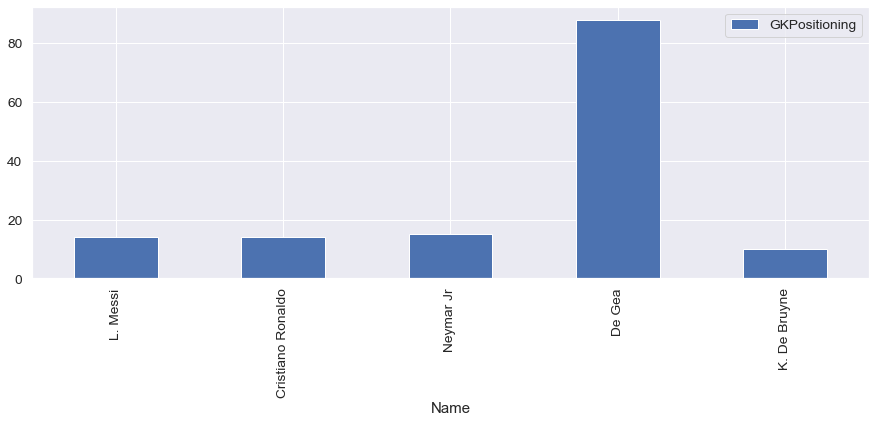

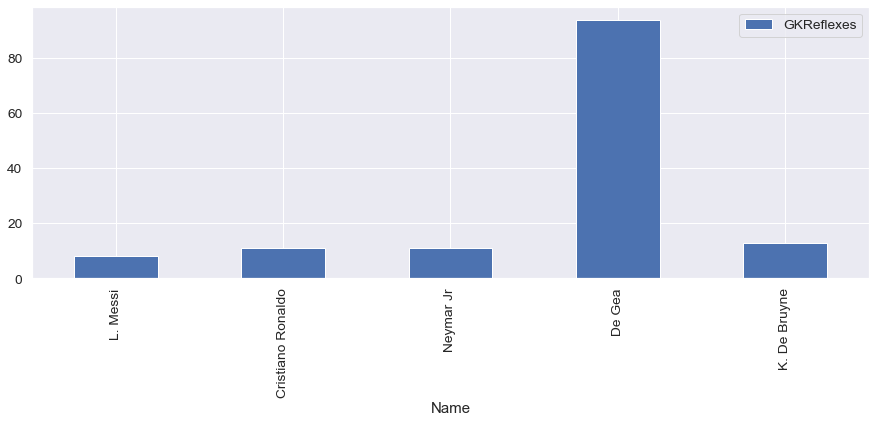

In [47]:
cols = data.iloc[:,52:86].columns
for col in cols:
    data.sort_values(['Overall'],ascending=False).head(5).plot(x='Name',y=col,kind='bar',figsize=(15,5))

## Bivariate analysis

### Age vs Overall

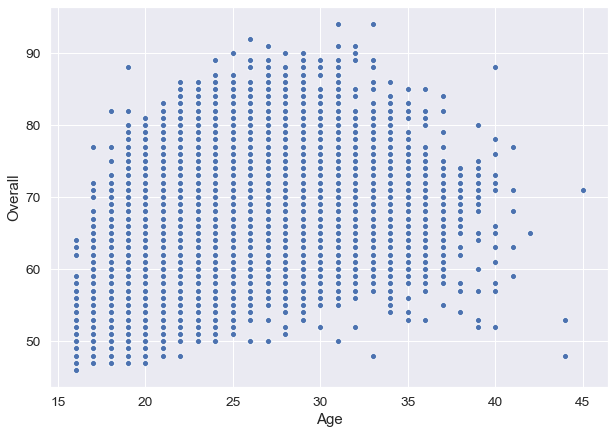

In [48]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Age',y='Overall')
plt.show()

Inferences:

* Players usually reach the peak of their careers (high overall) within the age of **24 to 33**.
* A player's overall grows with age and dwindles once their age crosses 33.

### Nationality vs Overall

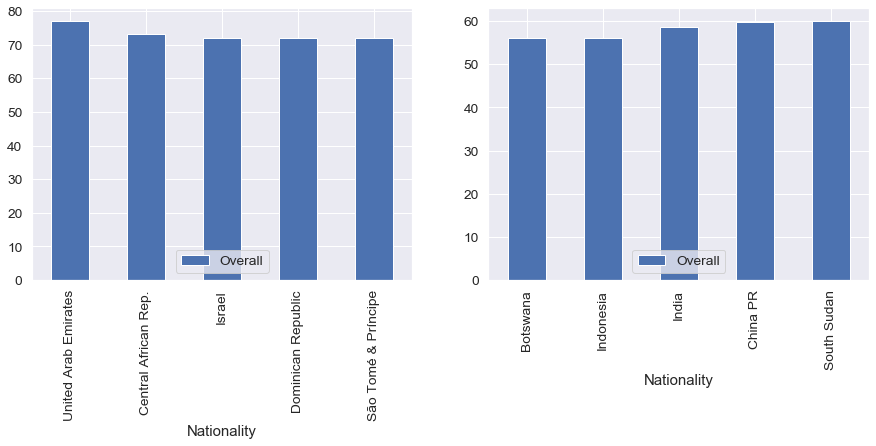

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
data.groupby(by=['Nationality'])['Overall'].mean().reset_index().sort_values(['Overall'],
                    ascending=False).head(5).plot(x='Nationality',y='Overall',kind='bar', ax=ax[0])
data.groupby(by=['Nationality'])['Overall'].mean().reset_index().sort_values(['Overall'],
                    ascending=True).head(5).plot(x='Nationality',y='Overall',kind='bar', ax=ax[1])
plt.show()

Inferences:

* Players from **United Arab Emirates**, **Central African Rep.**, **Israel, Dominican Republic** and **São Tomé & Príncipe** have the highest average overall ratings.
* Players from **Botswana**, **Indonesia**, **India**, **China PR** and **South Sudan** have the lowest average overall ratings.

### Potential vs Overall

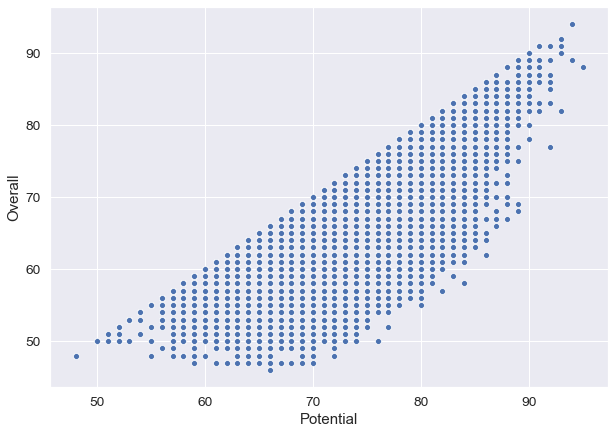

In [50]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Potential',y='Overall')
plt.show()

Inferences:

* A player's potential and overall are **linearly related to each other**.
* A player with a high potential is likely to grow to have a high overall.

### Club vs Overall

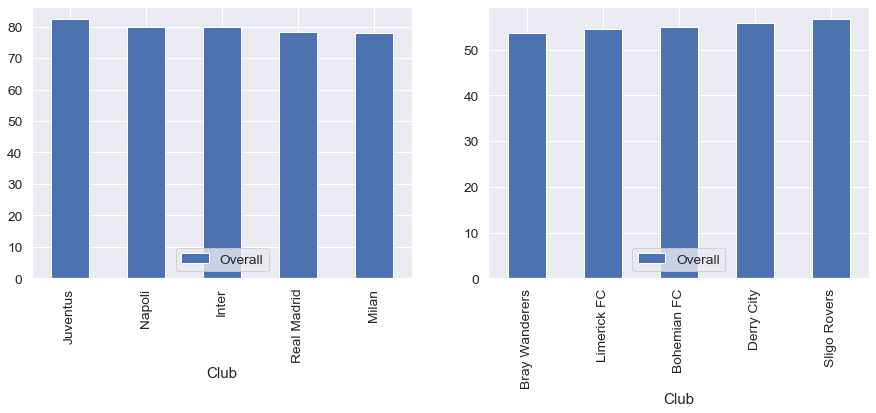

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))
data.groupby(by=['Club'])['Overall'].mean().reset_index().sort_values(['Overall'],
                    ascending=False).head(5).plot(x='Club',y='Overall',kind='bar', ax=ax[0])
data.groupby(by=['Club'])['Overall'].mean().reset_index().sort_values(['Overall'],
                    ascending=True).head(5).plot(x='Club',y='Overall',kind='bar', ax=ax[1])
plt.show()

Inferences:

* **Juventus**, **Napoli**, **Inter**, **Real Madrid** and **Milan** have the highest average overall ratings.
* Players from **Bray Wanderers**, **Limerick FC**, **Bohemian FC**, **Derby City** and **Silgo Rovers** have the lowest average overall ratings.

### Value vs Overall

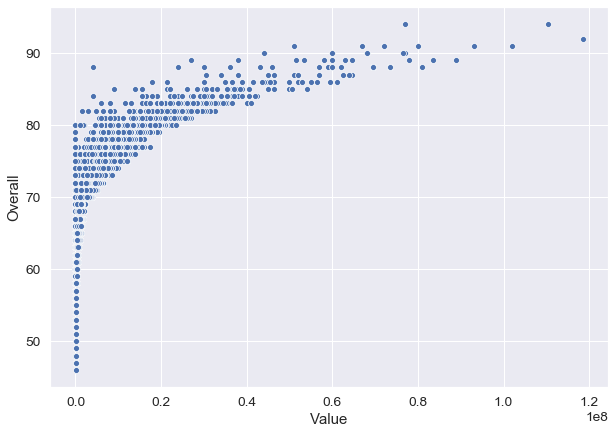

In [52]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Value',y='Overall')
plt.show()

Inferences:

* Overall ratings of a player has a **linear relationship** with value.
* A highly overall rated player is likely to have a high market value.

### Wage vs Overall

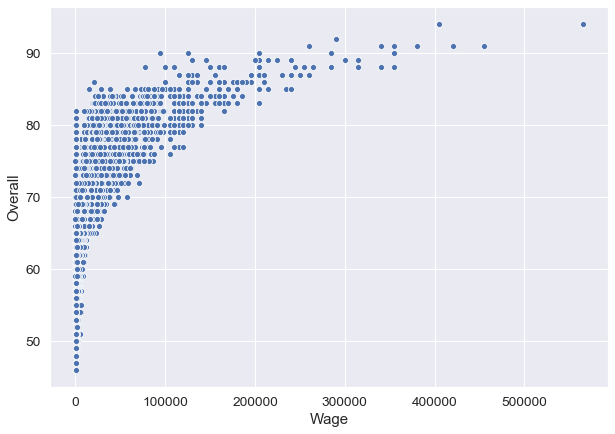

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Wage',y='Overall')
plt.show()

Inferences:

* Overall ratings of a player has a **linear relationship** with wage.
* A high overall rated player is likely to get paid more.

### Preferred Foot vs Overall

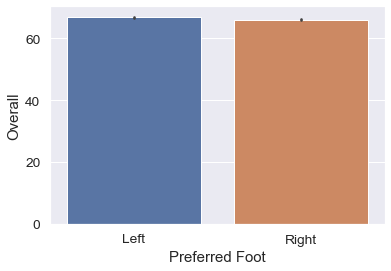

In [54]:
sns.barplot(data=data,x='Preferred Foot',y='Overall')
plt.show()

Inferences:

* There is **not much of a difference** in overall with respect to the preferred foot of players.

### International Reputation vs Overall

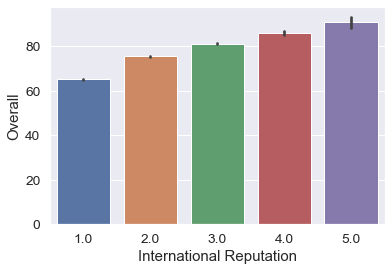

In [55]:
sns.barplot(data=data,x='International Reputation',y='Overall')
plt.show()

Inferences:

* The more overall rating a player has, the more international reputation he/she is likely to have.

### Weak Foot vs Overall

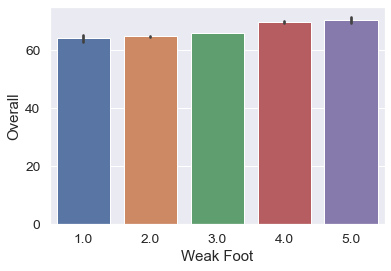

In [56]:
sns.barplot(data=data,x='Weak Foot',y='Overall')
plt.show()

Inferences:

* The more overall rating a player has, the more he/she is likely to have a highly rated weak foot.

### Skill Moves vs Overall

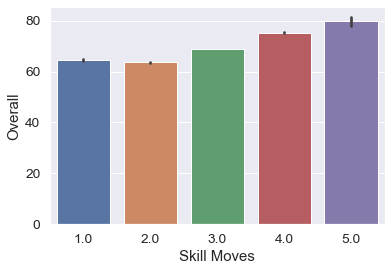

In [57]:
sns.barplot(data=data,x='Skill Moves',y='Overall')
plt.show()

Inferences:

* The more overall rating a player has, the more he/she is likely to have a highly rated skill move.

### Body Type vs Overall

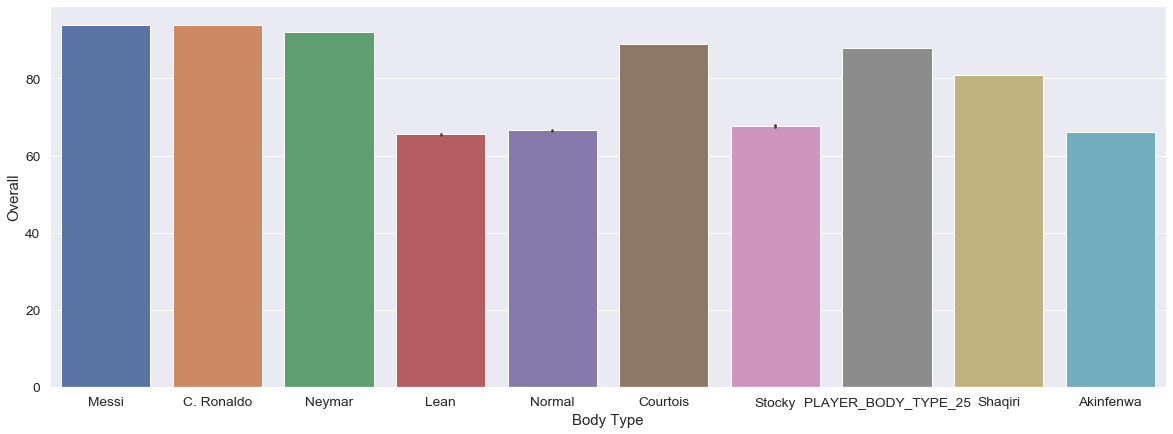

In [58]:
plt.figure(figsize=(20,7))
sns.barplot(data=data,x='Body Type',y='Overall')
plt.show()

Inferences:

* Messi, Ronaldo and Neymar and Courtois have the highest overall ratings.
* The general categories of body types have **not much of a difference** in mean overall ratings.

### Position vs Overall

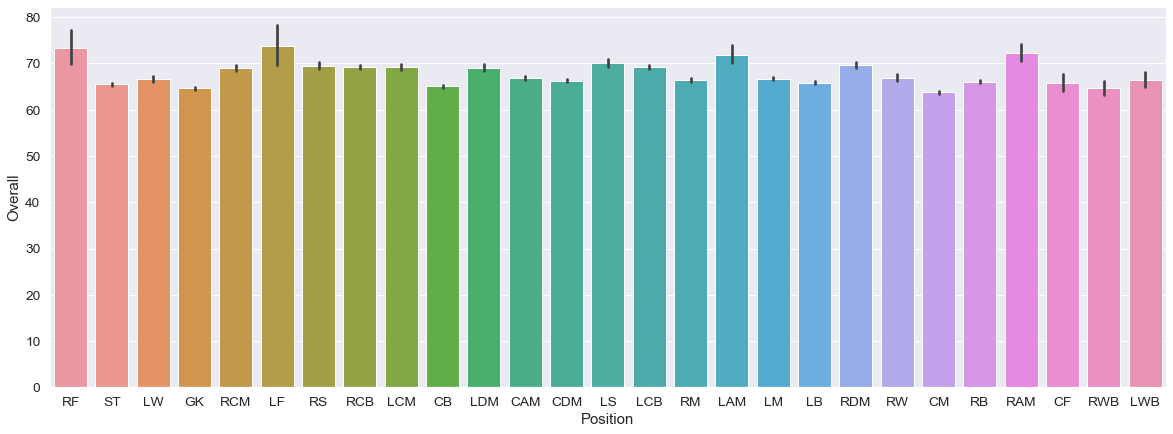

In [59]:
plt.figure(figsize=(20,7))
sns.barplot(data=data,x='Position',y='Overall')
plt.show()

Inferences:

* **Right Forwards**, **Left Forwards**, **Left Attacking Midfielders** and **Right Attacking Midfielders** have the highest average overall ratings.

### Joined vs Overall

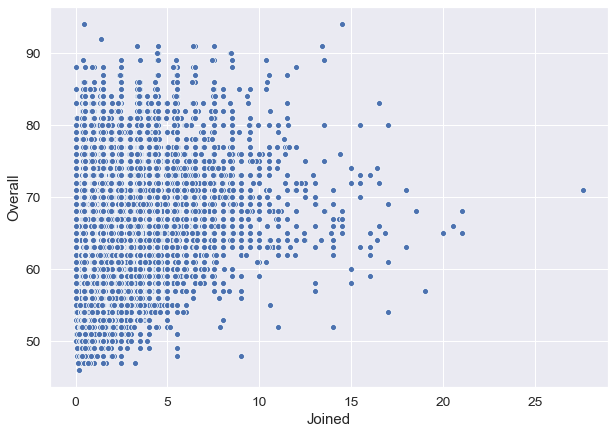

In [60]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Joined',y='Overall')
plt.show()

Inferences:

* Most players who have **joined under 5 years** have a very high overall rating.
* More the years increase beyond 5 years, the number of high overall rated players tend to decrease.

### Contract Valid Until vs Overall

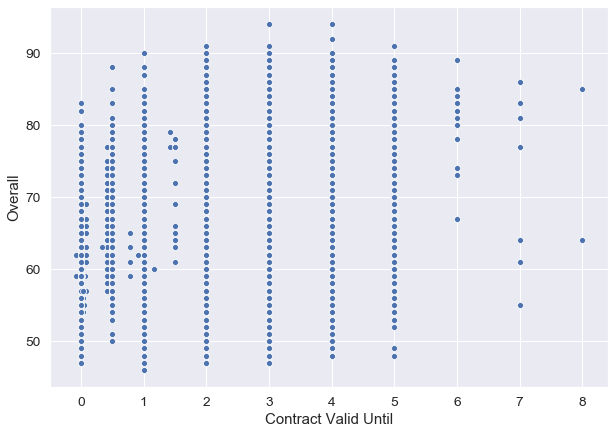

In [61]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Contract Valid Until',y='Overall')
plt.show()

Inferences:

* Most high rated players have a contract length of **1 to 5 years**.
* A club wants to retain its top players by giving them a long contract length.

### Weight vs Overall

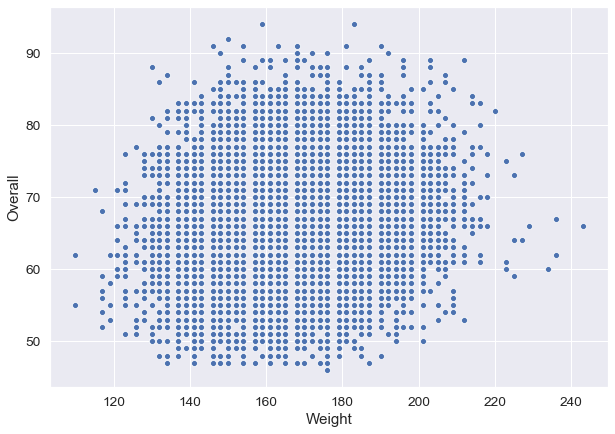

In [62]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='Weight',y='Overall')
plt.show()

Inferences:

* Most players (including the highly overall rated) are having a weight ranging from **145 lbs to 190 lbs**.
* The more the weight decreases or increases, the overall rate drops further indiciating underweight or overweight players (due to lack in fitness and proper diet) do not have high overall ratings.

### Attacking Work Rate vs Overall

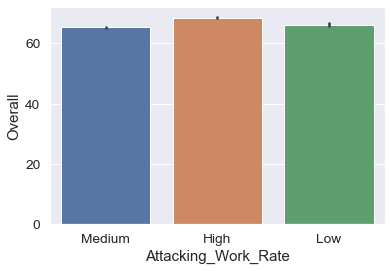

In [63]:
sns.barplot(data=data,x='Attacking_Work_Rate',y='Overall')
plt.show()

Inferences:

* A player with high attacking work rate is likely to have a better overall.

### Defending Work Rate vs Overall

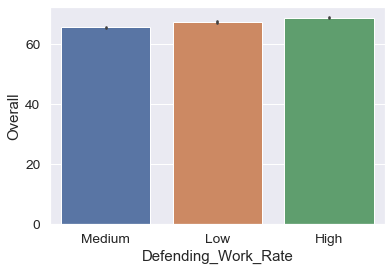

In [64]:
sns.barplot(data=data,x='Defending_Work_Rate',y='Overall')
plt.show()

Inferences:

* A player with high defending work rate is likely to have a better overall.

### Positional statistics vs Overall

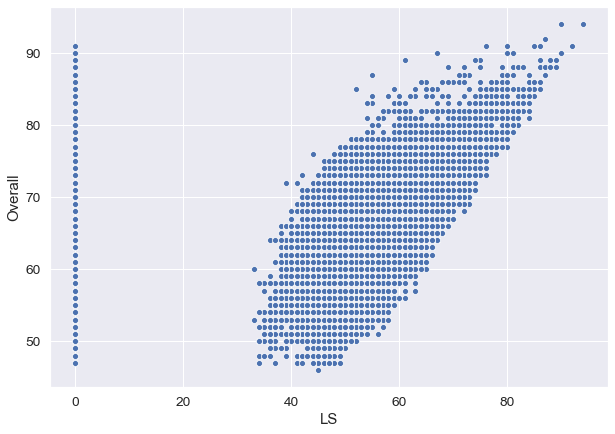

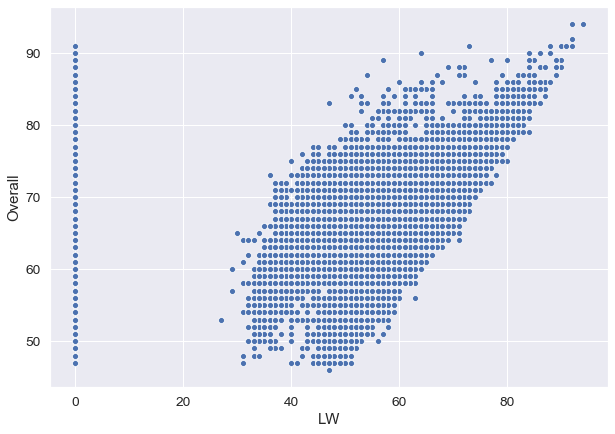

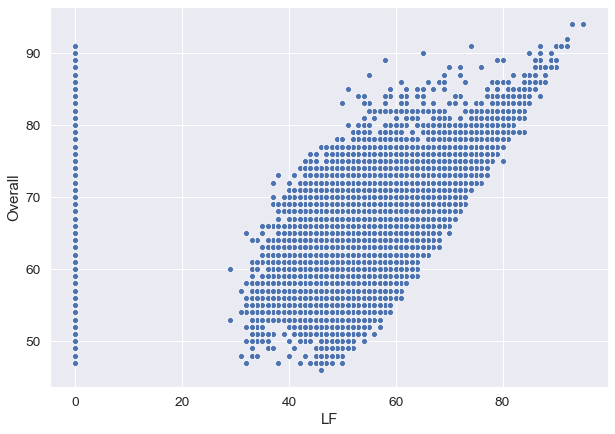

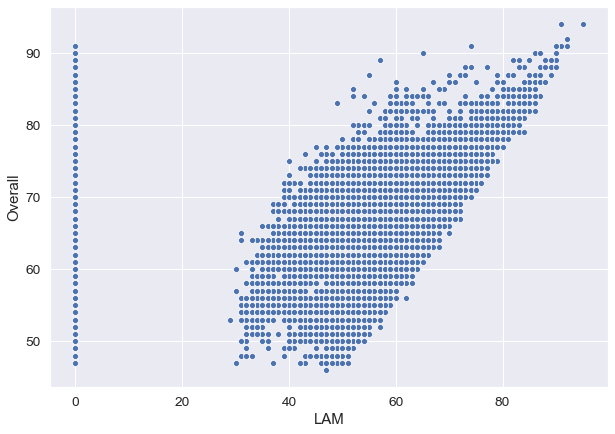

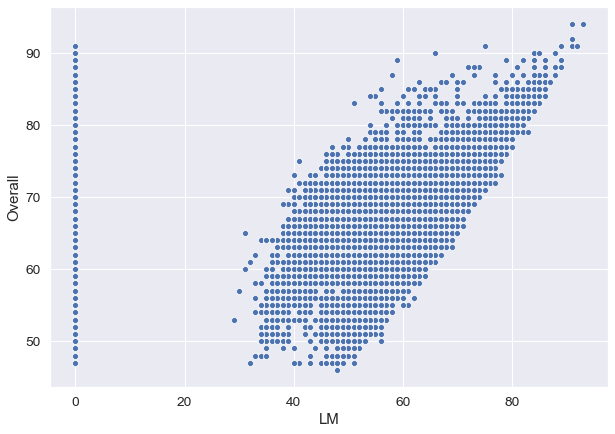

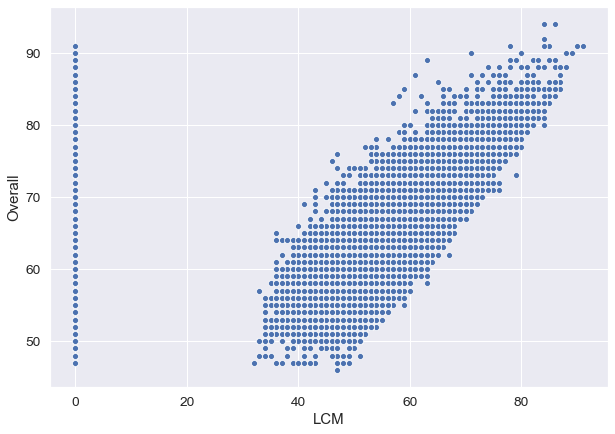

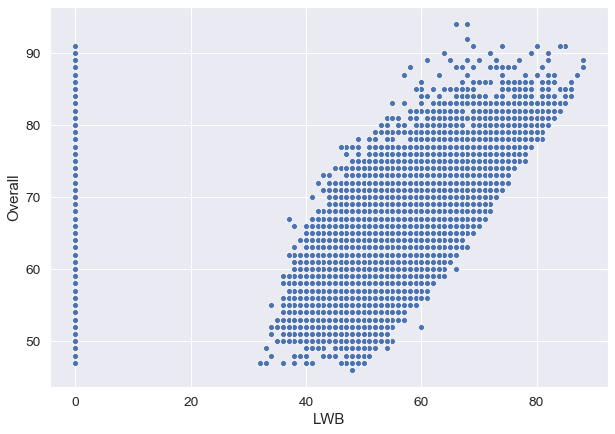

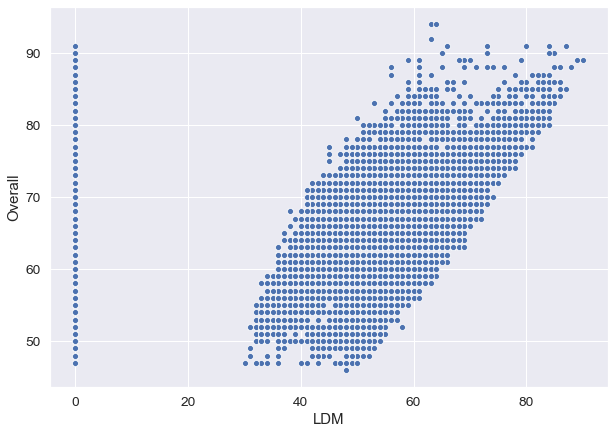

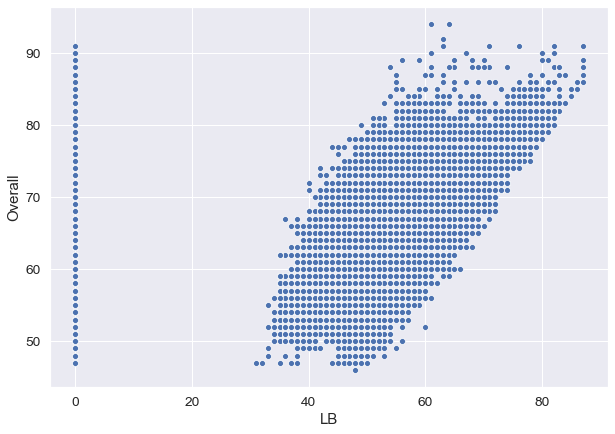

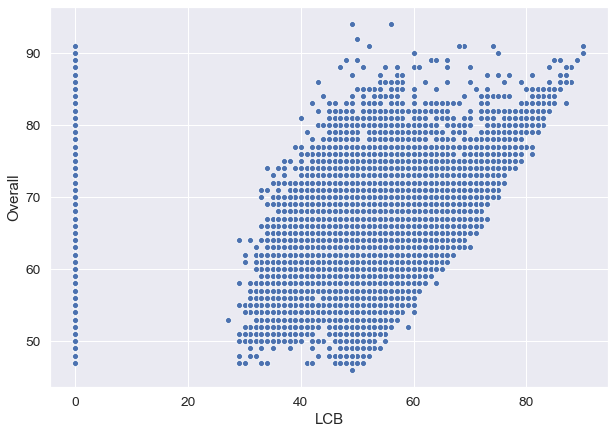

In [65]:
cols = ['LS','LW','LF','LAM','LM','LCM','LWB','LDM','LB','LCB']

for col in cols:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=data,x=col,y='Overall')
    plt.show()

Inferences:

* All positional ratings have a **linear relationship** with Overall rating.
* The ones having a positional overall rating of 0 but high overall rating are the goalkeepers.

### Attributes vs Overall

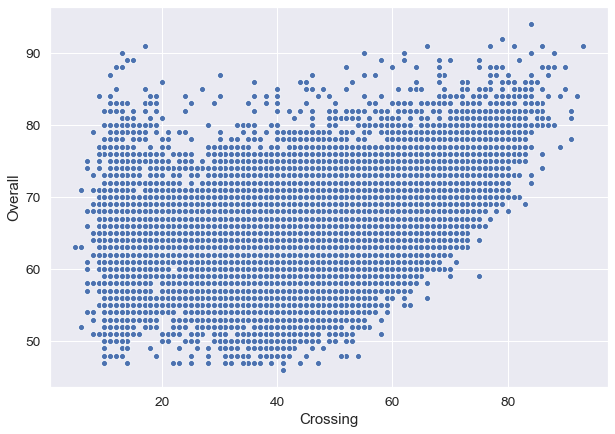

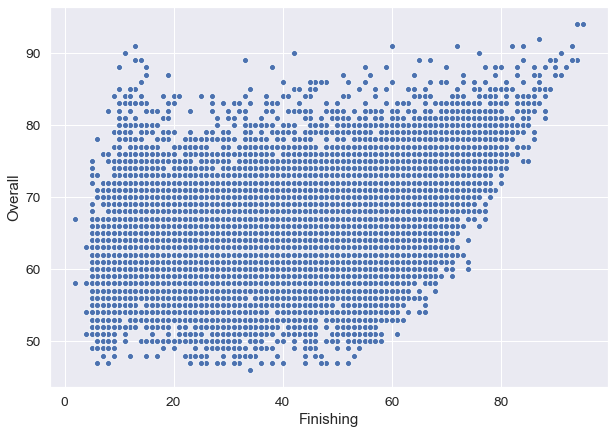

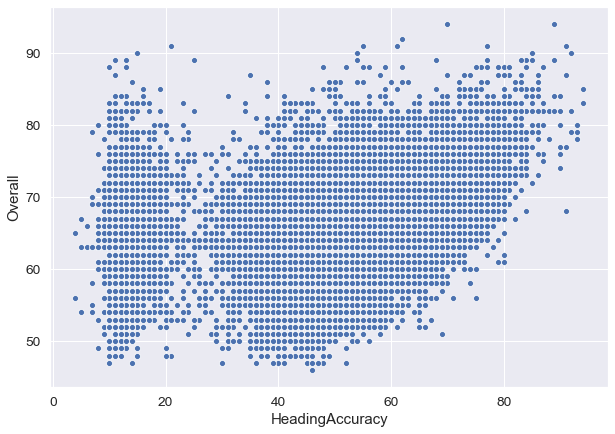

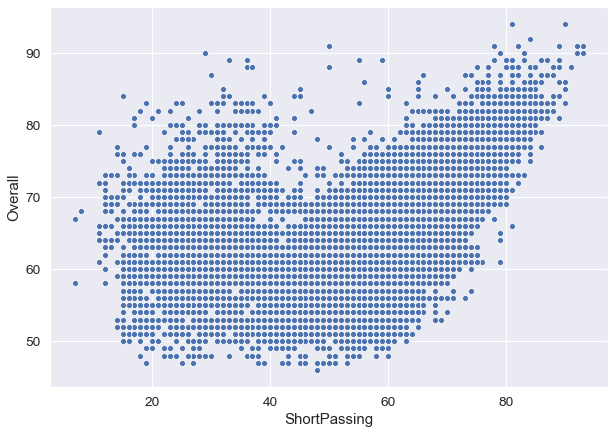

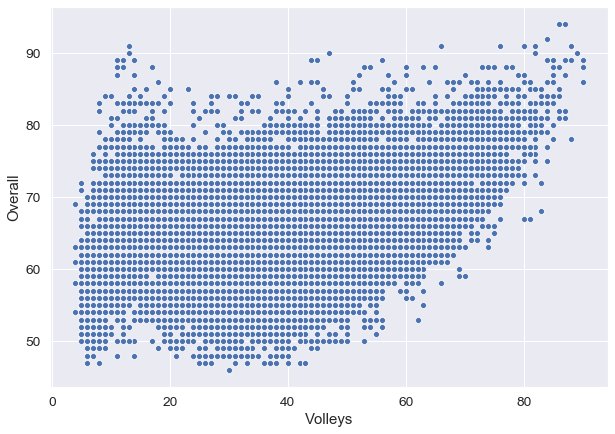

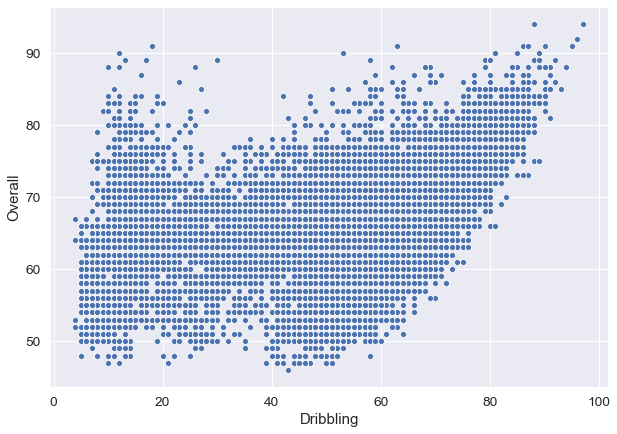

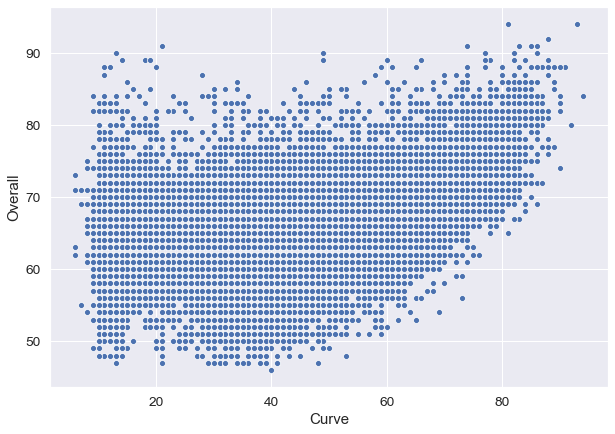

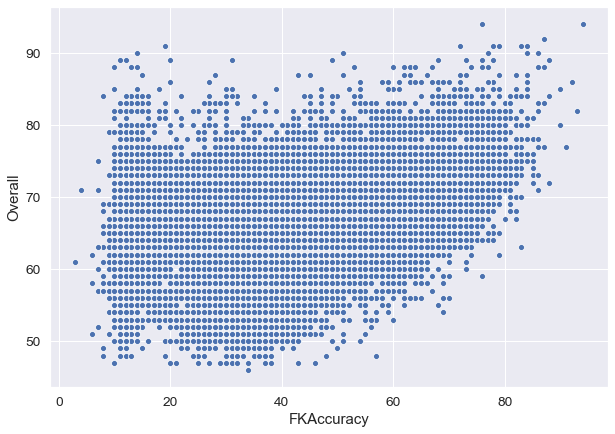

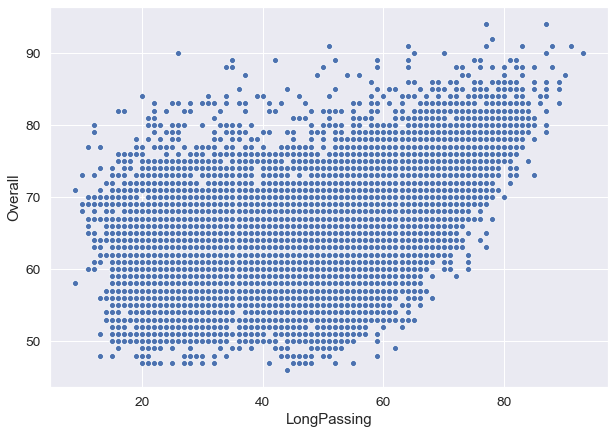

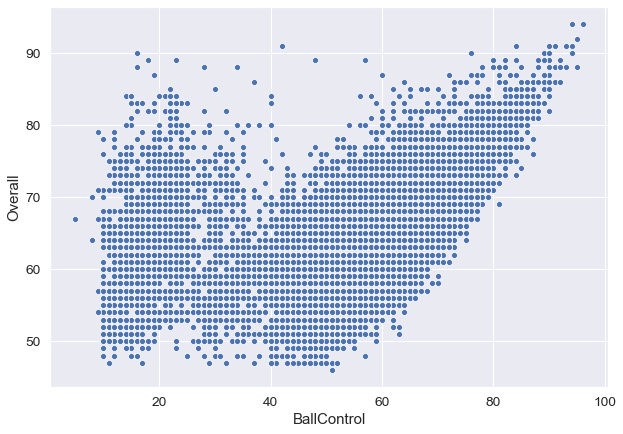

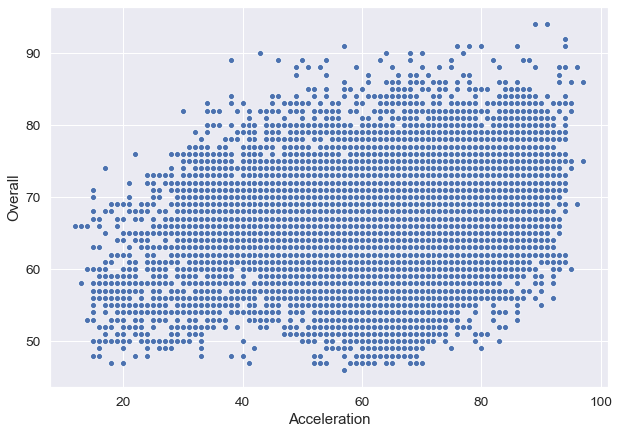

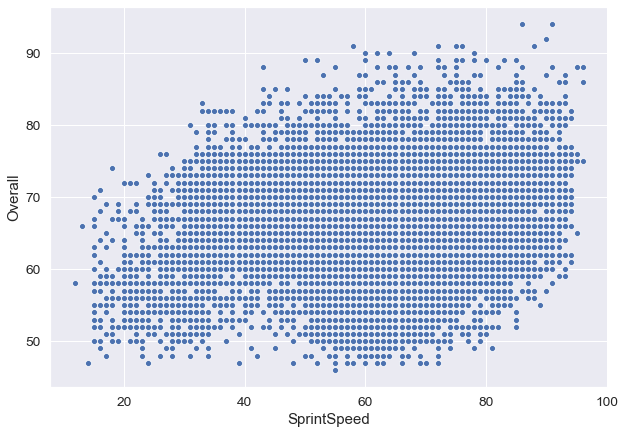

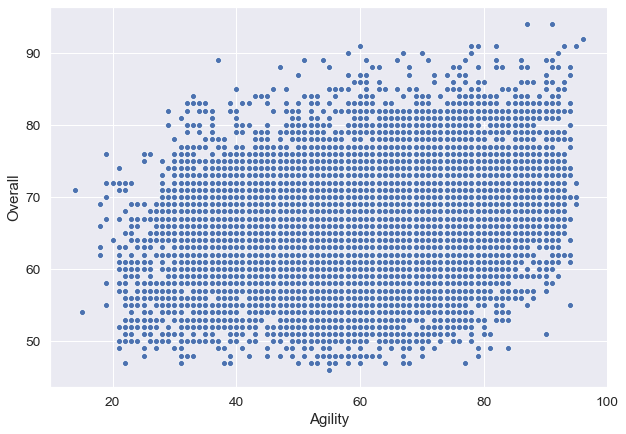

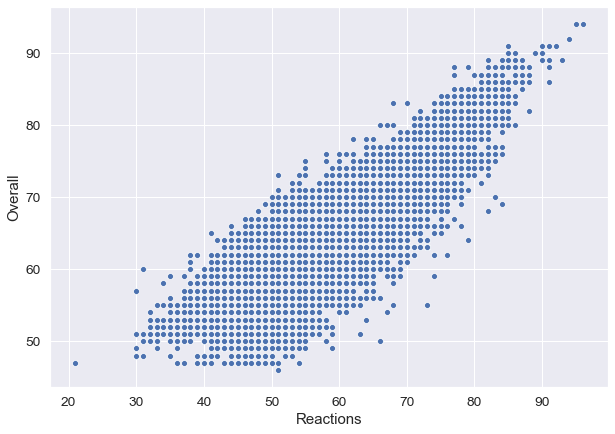

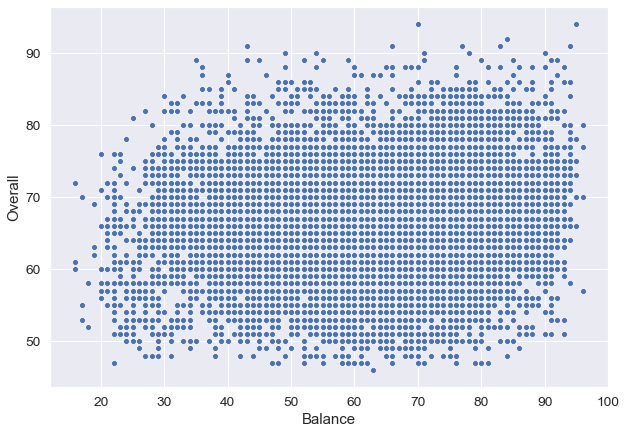

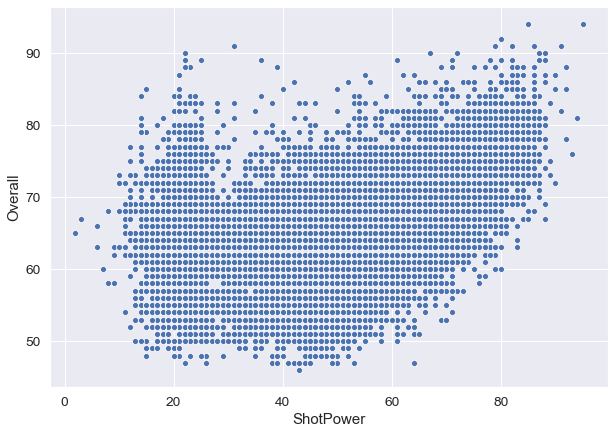

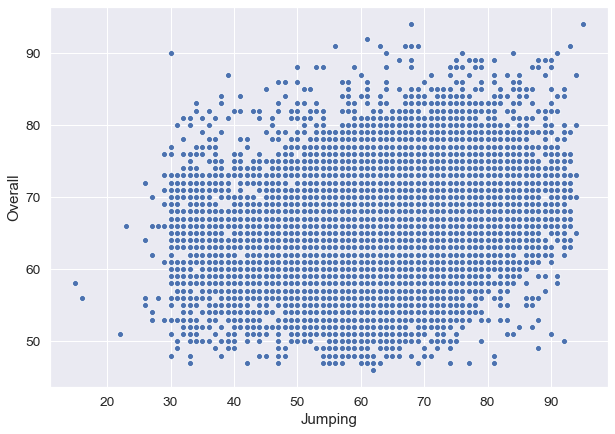

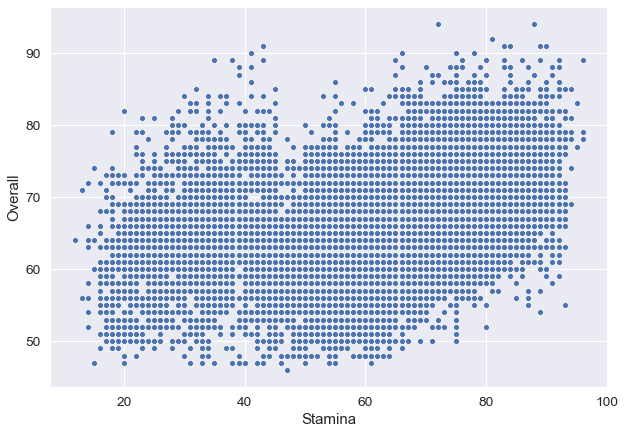

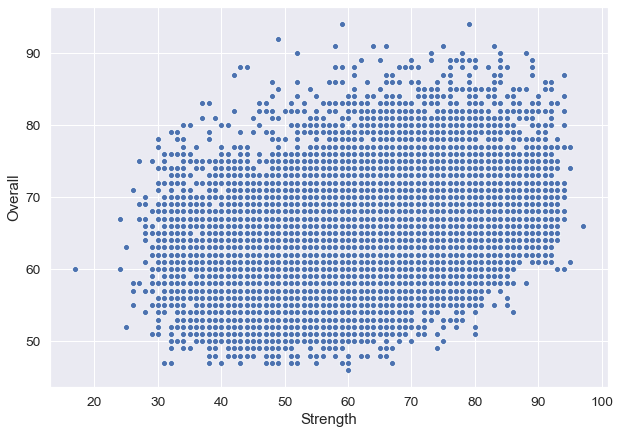

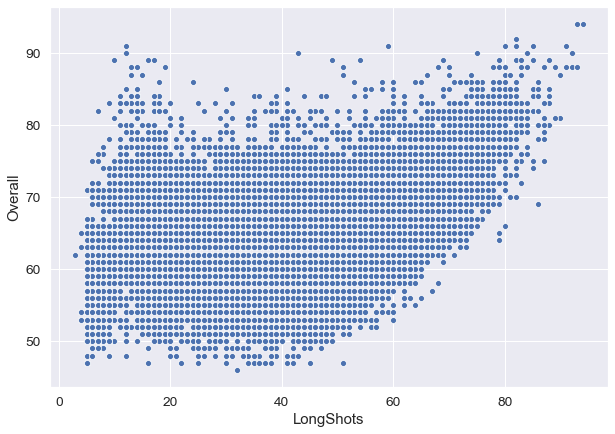

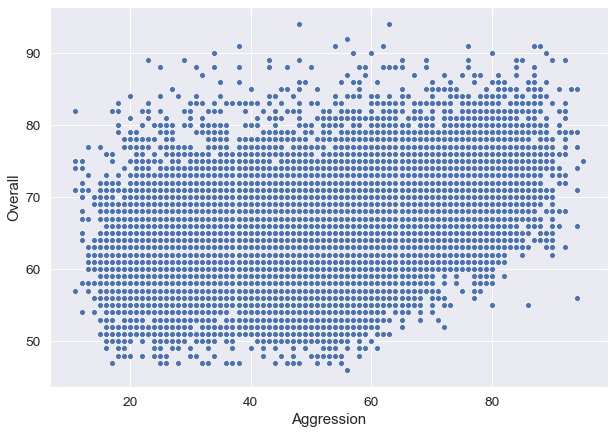

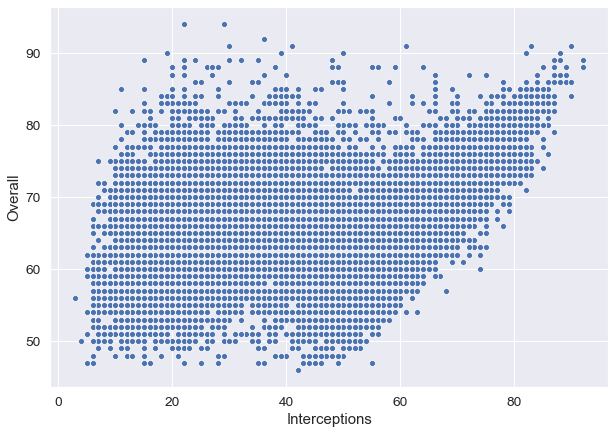

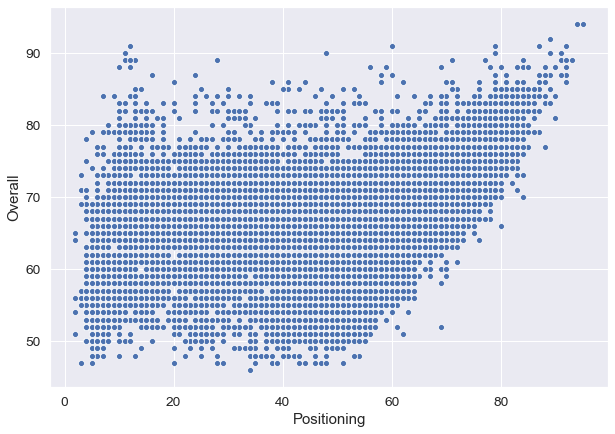

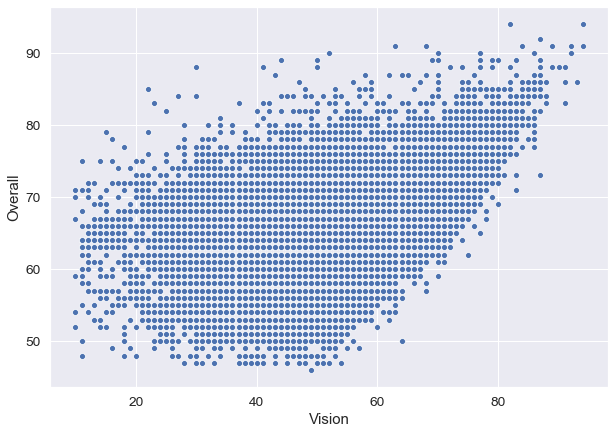

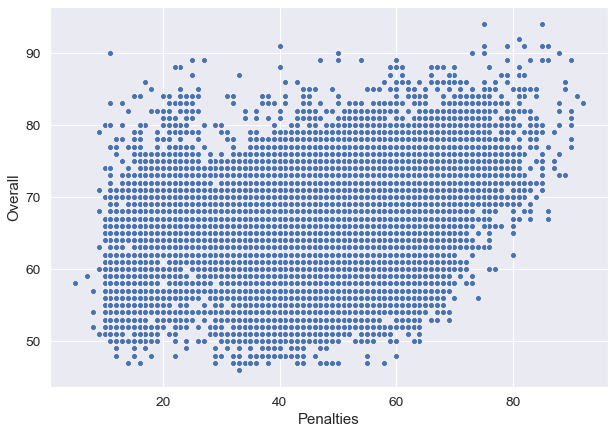

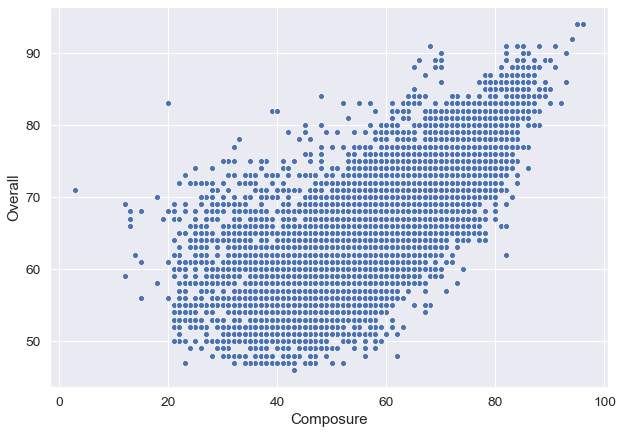

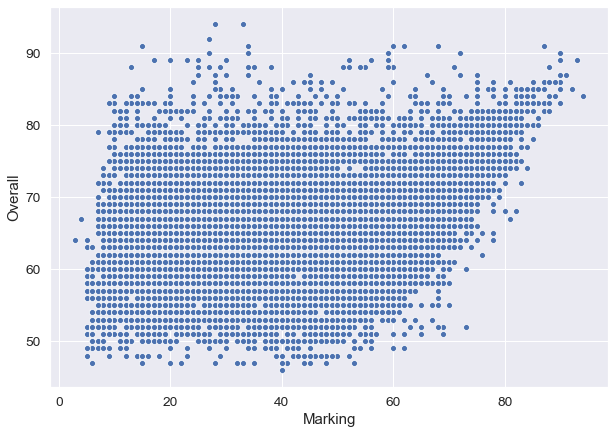

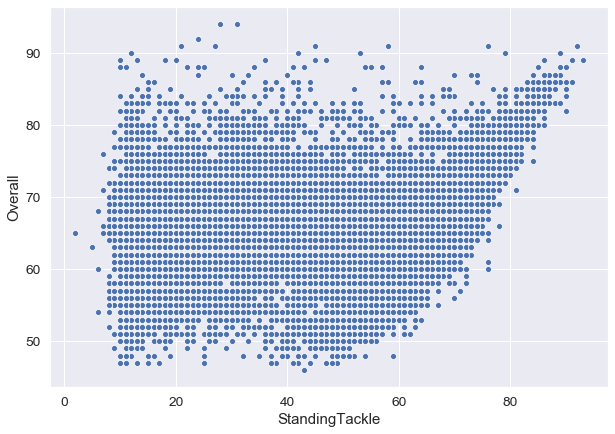

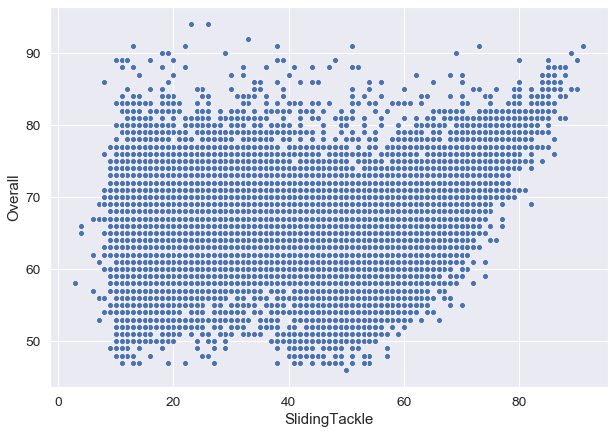

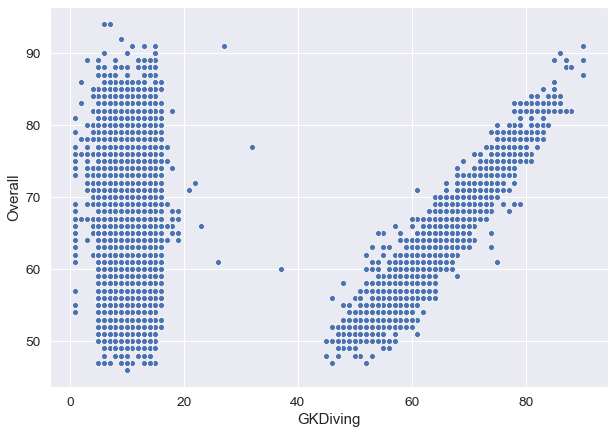

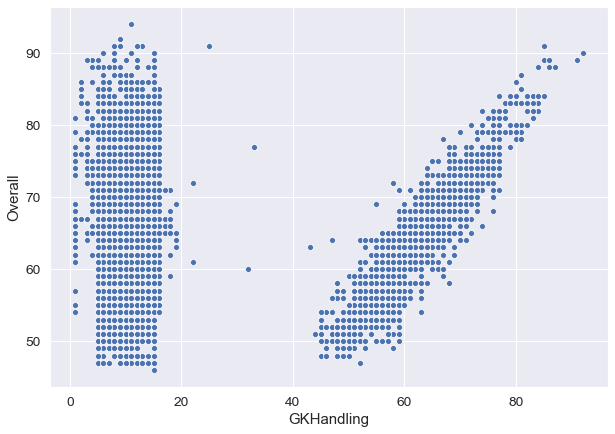

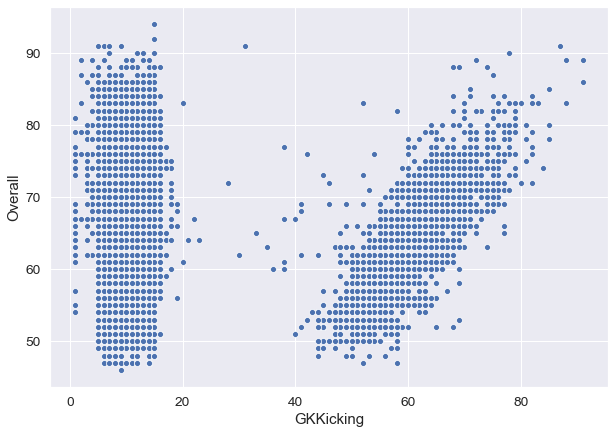

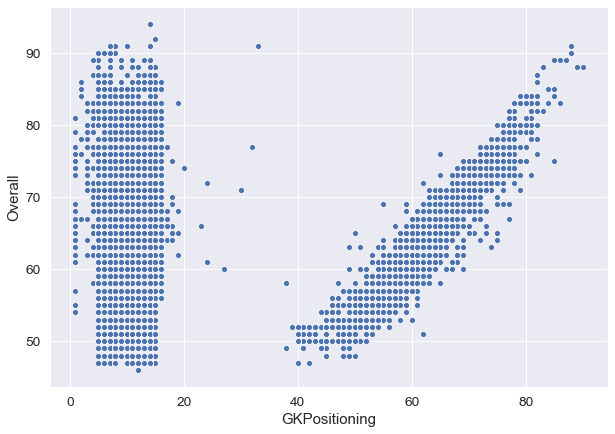

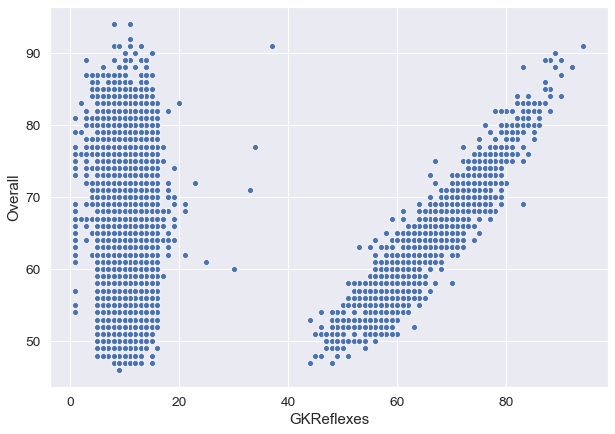

In [66]:
cols = data.iloc[:,52:86].columns
for col in cols:
    plt.figure(figsize=(10,7))
    sns.scatterplot(data=data,x=col,y='Overall')
    plt.show()

Inferences:

* All attributes have a **linear relationship** with Overall rating.
* The ones having non-goalkeeper atributes of 0 but high overall rating are the goalkeepers.
* The ones having goalkeeper atributes of 0 but high overall rating are the non-goalkeepers.

# Feature Engineering and Selection

Now that we have explored the trends and relationships within the data, we can work on engineering a set of features for our models. We can use the results of the EDA to inform this feature engineering.

Before we get any further, we should define what feature engineering and selection are! These definitions are informal and have considerable overlap, but I like to think of them as two separate processes:

**Feature Engineering**: The process of taking raw data and extracting or creating new features that allow a machine learning model to learn a mapping beween these features and the target. This might mean taking transformations of variables, such as we did with the log and square root, or one-hot encoding categorical variables so they can be used in a model. Generally, I think of feature engineering as adding additional features derived from the raw data.

**Feature Selection**: The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model. Generally, I think of feature selection as subtracting features so we are left with only those that are most important.

Feature engineering and selection are iterative processes that will usually require several attempts to get right. Often we will use the results of modeling, such as the feature importances from a random forest, to go back and redo feature selection, or we might later discover relationships that necessitate creating new variables. Moreover, these processes usually incorporate a mixture of domain knowledge and statistical qualitites of the data.

Feature engineering and selection often has the highest returns on time invested in a machine learning problem. It can take quite a while to get right, but is often more important than the exact algorithm and hyperparameters used for the model. If we don't feed the model the correct data, then we are setting it up to fail and we should not expect it to learn!

In this project, we will take the following steps for feature engineering:

* Group similar data.
* Convert object type variables to numerical by label encoding

For feature selection, we will do the following:

* Impute missing values
* Remove features features that do not have a significant effect on the dependent variable or prediction of output by backward elimination.

## Feature Engineering

### Nationality

We will group Nationality under two classes:

* Major Nation (**1**): Nation having players greater than or equal to 250
* Minor Nation (**0**): Nation having players less than 250

In [67]:
# Get a value counts of all nations
count = data['Nationality'].value_counts()

# List all those nations who has a value counts of 250 or more (Major Nations)
li = list(count[count >= 250].index)

# Function to categorize
def nation_cat(nation):
    if nation in li:
        return 'Major'
    else:
        return 'Minor'
    
# Applying function to categorize
data['Nationality'] = data['Nationality'].apply(nation_cat)

### Clubs

We will group Clubs under two classes:

* Major Club (**1**): Clubs having a mean player overall rating of 70 and above 
* Minor Club (**0**): Clubs having a mean player overall rating less than 70

In [68]:
# Function to categorize
def club_cat(club):
    if (data[data['Club']==club]['Overall'].mean())>=70:
        return 'Major'
    else:
        return 'Minor'

# Applying function to categorize
data['Club'] = data['Club'].apply(club_cat)

### Position

GK --> **GK** (Goal Keeper)     
RB, LB, CB, LCB, RCB, RWB, LWB --> **DF** (Defender)     
LDM, CDM, RDM --> **DM** (Defensive Midfielder)     
LM, LCM, CM, RCM, RM --> **MF** (Midfielder)     
LAM, CAM, RAM, LW, RW --> **AM** (Attacking Midfielder)     
RS, ST, LS, CF, LF, RF, --> **ST** (Striker)     

In [69]:
# Function to cateogize
def pos_cat(pos):
    if pos == 'GK':
        return 'GK'
    elif pos in ['RB','LB','CB','LCB','RCB','RWB','LWB']:
        return 'DF'
    elif pos in ['LDM','CDM','RDM']:
        return 'DM'
    elif pos in ['LM','LCM','CM','RCM','RM']:
        return 'MF'
    elif pos in ['LAM','CAM','RAM','LW','RW']:
        return 'AM'
    else:
        return 'ST'

# Applying function to categorize:
data['Position'] = data['Position'].apply(pos_cat)

In [70]:
# Fetching names of all object type categorical columns
cols = ['Nationality','Club','Position','Attacking_Work_Rate','Defending_Work_Rate']

# Using label encoder to convert cols to numerical
labelencoder = LabelEncoder()

for col in cols:
    data[col] = labelencoder.fit_transform(data[col])

## Feature Selection

### Imputing Missing Values

Standard machine learning models cannot deal with missing values, and which means we have to find a way to fill these in or disard any features with missing values. Since we already removed features with more than 50% missing values in the first part, here we will focus on filling in these missing values, a process known as imputation. There are a number of methods for imputation but here we will use the relatively simple method of replacing missing values with the next row value of the column known as forward fill or 0 whichever fulfills more logic.

In [71]:
# Dropping all insignificant features
data.drop(['Unnamed: 0','ID','Name','Photo','Flag','Club Logo','Special','Preferred Foot','Body Type','Real Face',
          'Jersey Number'],axis=1,inplace=True)

In [72]:
# International Reputation
data['International Reputation'].fillna(method='ffill', inplace=True)

# Weak Foot
data['Weak Foot'].fillna(method='ffill', inplace=True)

# Skill Moves
data['Skill Moves'].fillna(method='ffill', inplace=True)

# Attributes
cols = data.iloc[:,41:75].columns

for col in cols:
    data[col].fillna(0, inplace=True)

### Backward Elimination

**Backward Elimination**: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [73]:
# split the dependent and independent variable
X = data.drop("Overall",axis=1)   #Feature Matrix
y = data["Overall"]   #Target Variable 

In [74]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Total features selected:",len(selected_features_BE))
print("The features:\n",selected_features_BE)

Total features selected: 57
The features:
 ['Age', 'Nationality', 'Potential', 'Club', 'Value', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Position', 'Joined', 'Weight', 'LS', 'ST', 'RS', 'LF', 'CF', 'RF', 'LAM', 'CAM', 'RAM', 'LM', 'RM', 'LDM', 'CDM', 'RDM', 'LCB', 'CB', 'RCB', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Vision', 'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKPositioning', 'GKReflexes', 'Release Clause', 'Attacking_Work_Rate', 'Defending_Work_Rate']


Our final dataset now has 58 features (one of the columns is the target).While a large number of features may be problematic for models such as linear regression, models such as the random forest perform implicit feature selection and automatically determine which features are important during traning. There are other feature selection steps to take, but for now we will keep the selected 57 features and see how the model performs.

# Split Into Training and Testing Sets

In machine learning, we always need to separate our features into two sets:     
     
**Training set** which we provide to our model during training along with the answers so it can learn a mapping between the features and the target.     
**Testing set** which we use to evaluate the mapping learned by the model. The model has never seen the answers on the testing set, but instead, must make predictions using only the features. As we know the true answers for the test set, we can then compare the test predictions to the true test targets to ghet an estimate of how well our model will perform when deployed in the real world.     
For our problem, we will split the dataset into a testing set of 30% and a training set of 70%.     
     
Splitting the data into a random training and testing set is simple using scikit-learn. We can set the random state of the split to ensure consistent results.     

In [75]:
# Separate out the features and targets
X = data.loc[:,selected_features_BE]
y= data['Overall']

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

(18207, 57)
(5463, 57)
(18207,)
(5463,)


We have 18207 players with an overall rating in the training set, and 5463 players with an overall rating in the testing set. We have one final step to take in this notebook: determining a naive baseline for our models to beat! 

# Establish a Baseline

It's important to establish a naive baseline before we beginning making machine learning models. If the models we build cannot outperform a naive guess then we might have to admit that machine learning is not suited for this problem. This could be because we are not using the right models, because we need more data, or because there is a simpler solution that does not require machine learning. Establishing a baseline is crucial so we do not end up building a machine learning model only to realize we can't actually solve the problem.     
     
For a regression task, a good naive baseline is to predict the median value of the target on the training set for all examples on the test set. This is simple to implement and sets a relatively low bar for our models: if they cannot do better than guessing the median value, then we will need to rethink our approach.

## Metric: Mean Absolute Error

There are a number of metrics used in machine learning tasks and it can be difficult to know which one to choose. Most of the time it will depend on the particular problem and if you have a specific goal to optimize for. I like Andrew Ng's advice to use a single real-value performance metric in order to compare models because it simplifies the evaluate process. Rather than calculating multiple metrics and trying to determine how important each one is, we should use a single number. In this case, because we doing regression, the mean absolute error is an appropriate metric. This is also interpretable because it represents the average amount our estimate if off by in the same units as the target value.     
     
The function below calculates the mean absolute error between true values and predictions.

In [76]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

Now we can make the median guess and evaluate it on the test set.

In [77]:
baseline_guess = np.median(y)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 5.3401


This shows our average estimate on the test set is off by about 5.34 points. The overall ratings are between 1 and 100 so this means the average error from a naive method if about 5.34%. The naive method of guessing the median training value provides us a low baseline for our models to beat!

# Scaling Features

The final step to take before we can build our models is to scale the features. This is necessary because features are in different units, and we want to normalize the features so the units do not affect the algorithm. Linear Regression and Random Forest do not require feature scaling, but other methods, such as support vector machines and k nearest neighbors, do require it because they take into account the Euclidean distance between observations. For this reason, it is a best practice to scale features when we are comparing multiple algorithms.

There are two ways to scale features:

* For each value, subtract the mean of the feature and divide by the standard deviation of the feature. This is known as standardization and results in each feature having a mean of 0 and a standard deviation of 1.
* For each value, subtract the minimum value of the feature and divide by the maximum minus the minimum for the feature (the range). This assures that all the values for a feature are between 0 and 1 and is called scaling to a range or normalization.

When we train the scaling object, we want to use only the training set. When we transform features, we will transform both the training set and the testing set.

In [78]:
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# Models to Evaluate

We will compare five different machine learning models using the great Scikit-Learn library:

* Linear Regression
* Random Forest Regression
* Gradient Boosting Regression
* K-Nearest Neighbors Regression

To compare the models, we are going to be mostly using the Scikit-Learn defaults for the model hyperparameters. Generally these will perform decently, but should be optimized before actually using a model. At first, we just want to determine the baseline performance of each model, and then we can select the best performing model for further optimization using hyperparameter tuning. The default hyperparameters will get a model up and running, but nearly always should be adjusted using some sort of search to find the best settings for your problem!

Here is what the Scikit-learn documentation says about the defaults:

__Sensible defaults__: Whenever an operation requires a user-defined parameter,
an appropriate default value is defined by the library. The default value
should cause the operation to be performed in a sensible way (giving a baseline
solution for the task at hand.)

One of the best parts about scikit-learn is that all models are implemented in an identical manner: once you know how to build one, you can implement an extremely diverse array of models. Here we will implement the entire training and testing procedures for a number of models in just a few lines of code.

In [79]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train_sc, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test_sc)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [80]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print('Linear Regression Performance on the test set: MAE = %0.4f' % lr_mae)

Linear Regression Performance on the test set: MAE = 1.4870


In [81]:
random_forest = RandomForestRegressor()
random_forest_mae = fit_and_evaluate(random_forest)

print('Random Forest Regression Performance on the test set: MAE = %0.4f' % random_forest_mae)

Random Forest Regression Performance on the test set: MAE = 0.2795


In [82]:
gradient_boosted = GradientBoostingRegressor()
gradient_boosted_mae = fit_and_evaluate(gradient_boosted)

print('Gradient Boosted Regression Performance on the test set: MAE = %0.4f' % gradient_boosted_mae)

Gradient Boosted Regression Performance on the test set: MAE = 0.5003


In [83]:
knn = KNeighborsRegressor()
knn_mae = fit_and_evaluate(knn)

print('K-Nearest Neighbors Regression Performance on the test set: MAE = %0.4f' % knn_mae)

K-Nearest Neighbors Regression Performance on the test set: MAE = 1.5952


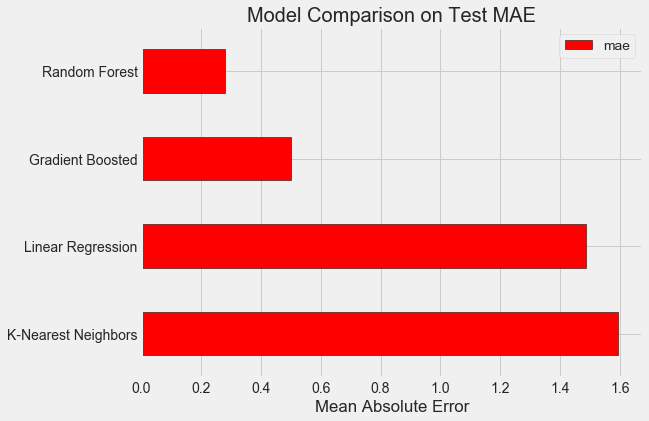

In [84]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# Dataframe to hold the results
model_comparison = pd.DataFrame({'model': ['Linear Regression', 'Random Forest', 'Gradient Boosted', 'K-Nearest Neighbors'],
                                 'mae': [lr_mae, random_forest_mae, 
                                         gradient_boosted_mae, knn_mae]})

# Horizontal bar chart of test mae
model_comparison.sort_values('mae', ascending = False).plot(x = 'model', y = 'mae', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('Mean Absolute Error'); plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20);

Depending on the run (the exact results change slighty each time), the random forest regressor performs the best followed by the gradient boosting regressor. I have to admit that this is not the most fair comparison because we are using mostly the default hyperparameters. The random forest and gradient boosting methods are great for starting out because the performance is less dependent on the model settings. Nonetheless, from these results, we can conclude that machine learning is applicable because all the models significantly outperform the baseline!     
     
From here, I am going to concentrate on optimizing the best model using hyperparamter tuning. Given the results here, I will concentrate on using the random forest regressor.

# Model Optimization

In machine learning, optimizing a model means finding the best set of hyperparameters for a particular problem.

## Hyperparameters

First off, we need to understand what model hyperparameters are in contrast to model parameters :     
     
* **Model hyperparameters** are best thought of as settings for a machine learning algorithm that are tuned by the data scientist before training. Examples would be the number of trees in the random forest, or the number of neighbors used in K Nearest Neighbors Regression.     
* **Model parameters** are what the model learns during training, such as the weights in the linear regression.     
We as data scientists control a model by choosing the hyperparameters, and these choices can have a significant effect on the final performance of the model (although usually not as great of an effect as getting more data or engineering features).     
Tuning the model hyperparameters controls the balance of under vs over fitting in a model. We can try to correct for under-fitting by making a more complex model, such as using more trees in a random forest or more layers in a deep neural network. A model that underfits has high bias, and occurs when our model does not have enough capacity (degrees of freedom) to learn the relationship between the features and the target. We can try to correct for overfitting by limiting the complexity of the model and applying regularization. This might mean decreasing the degree of a polynomial regression, or adding dropout layers to a deep neural network. A model that overfits has high variance and in effect has memorized the training set. Both underfitting and overfitting lead to poor generalization performance on the test set.     
     
The problem with choosing the hyperparameters is that no set will work best across all problems. Therefore, for every new dataset, we have to find the best settings. This can be a time-consuming process, but luckily there are several options for performing this procedure in Scikit-Learn.

## Hyperparameter Tuning with Random Search and Cross Validation

We can choose the best hyperparameters for a model through random search and cross validation.     
     
* Random search refers to the method in which we choose hyperparameters to evaluate: we define a range of options, and then randomly select combinations to try. This is in contrast to grid search which evaluates every single combination we specify. Generally, random search is better when we have limited knowledge of the best model hyperparameters and we can use random search to narrow down the options and then use grid search with a more limited range of options.     
* Cross validation is the method used to assess the performance of the hyperparameters. Rather than splitting the training set up into separate training and validation sets which reduces the amount of training data we can use, we use K-Fold Cross Validation. This means dividing the training data into K folds, and then going through an iterative process where we first train on K-1 of the folds and then evaluate performance on the kth fold. We repeat this process K times so eventually we will have tested on every example in the training data with the key that each iteration we are testing on data that we **did not train on**. At the end of K-fold cross validation, we take the average error on each of the K iterations as the final performance measure and then train the model on all the training data at once. The performance we record is then used to compare different combinations of hyperparameters.
      
Here we will implement random search with cross validation to select the optimal hyperparameters for the random forest regressor. We first define a grid then peform an iterative process of: randomly sample a set of hyperparameters from the grid, evaluate the hyperparameters using 4-fold cross-validation, and then select the hyperparameters with the best performance.

Of course we don't actually do this iteration ourselves, we let Scikit-Learn and RandomizedSearchCV do the process for us!

In [85]:
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Whether bootstrap samples are used when building trees
bootstrap = ['True','False']

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                       'bootstrap': bootstrap}

We selected 6 different hyperparameters to tune in the random forest regressor. These all will affect the model in different ways that are hard to determine ahead of time, and the only method for finding the best combination for a specific problem is to test them out! We are trying to find the best combination of hyperparameters and because there is no theory to tell us which will work best, we just have to evaluate them, like runnning an experiment!     
     
In the code below, we create the Randomized Search Object passing in the following parameters:      
      
* **estimator**: the model
* **param_distributions**: the distribution of parameters we defined
* **cv**: the number of folds to use for k-fold cross validation
* **n_iter**: the number of different combinations to try
* **scoring**: which metric to use when evaluating candidates
* **n_jobs**: number of cores to run in parallel (-1 will use all available)
* **verbose**: how much information to display (1 displays a limited amount)
* **return_train_score**: return the training score for each cross-validation fold
* **random_state**: fixes the random number generator used so we get the same results every run     
     
The Randomized Search Object is trained the same way as any other scikit-learn model. After training, we can compare all the different hyperparameter combinations and find the best performing one.

In [86]:
# Create the model to use for hyperparameter tuning
model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_absolute_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [87]:
# Fit on the training data
random_cv.fit(X_train_sc, y_train)

Fitting 4 folds for each of 25 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 25.9min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


The best random forest model has the following hyperparameters:      
     
**n_estimators** = 1100     
**max_depth** = 15      
**min_samples_leaf** = 2      
**min_samples_split** = 10     
**max_features** = auto      
     
Using random search is a good method to narrow down the possible hyperparameters to try. Initially, we had no idea which combination would work the best, but this at least narrows down the range of options.      
      
We could use the random search results to inform a grid search by creating a grid with hyperparameters close to those that worked best during the randomized search. However, rather than evaluating all of these settings again, I will focus on a single one, the number of trees in the forest (n_estimators). By varying only one hyperparameter, we can directly observe how it affects performance. In the case of the number of trees, we would expect to see a significant affect on the amount of under vs overfitting.      
      
Here we will use grid search with a grid that only has the n_estimators hyperparameter. We will evaluate a range of trees then plot the training and testing performance to get an idea of what increasing the number of trees does for our model. We will fix the other hyperparameters at the best values returned from random search to isolate the number of trees effect.

In [88]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = RandomForestRegressor(max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  max_features = 'auto',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [89]:
# Fit the grid search
grid_search.fit(X_train_sc, y_train)

Fitting 4 folds for each of 15 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 25.7min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=15, max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=2,
                                             min_samples_split=10,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'n_estimators': [100, 150, 200, 250, 300, 350, 400,
                             

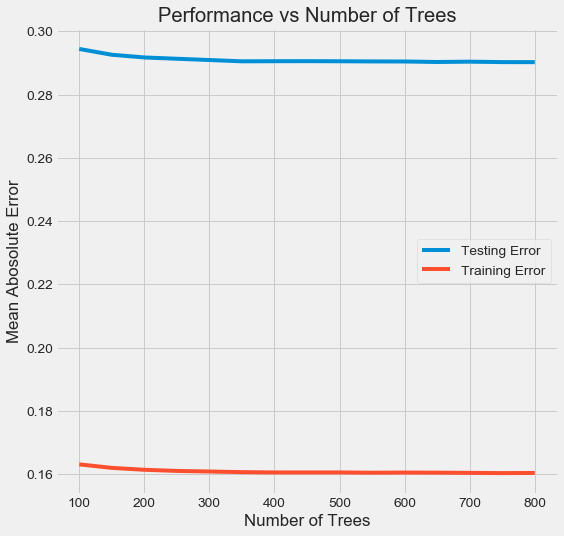

In [90]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [91]:
results.sort_values('mean_test_score', ascending = False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
14,179.869495,0.206815,0.507038,0.004472,800,{'n_estimators': 800},-0.288208,-0.295930,-0.283842,-0.293208,-0.290297,0.004643,1,-0.162713,-0.159467,-0.159767,-0.159619,-0.160392,0.001344
13,169.164940,0.243996,0.479708,0.014782,750,{'n_estimators': 750},-0.288291,-0.296212,-0.283513,-0.293222,-0.290309,0.004837,2,-0.162735,-0.159465,-0.159565,-0.159617,-0.160346,0.001381
11,148.080871,0.102655,0.421227,0.009268,650,{'n_estimators': 650},-0.288392,-0.296427,-0.283439,-0.293106,-0.290341,0.004902,3,-0.162981,-0.159556,-0.159770,-0.159616,-0.160481,0.001445
12,157.923260,0.057651,0.445837,0.004924,700,{'n_estimators': 700},-0.288405,-0.296399,-0.283670,-0.293311,-0.290446,0.004841,4,-0.162897,-0.159457,-0.159665,-0.159632,-0.160412,0.001436
10,134.976816,0.130699,0.398485,0.015234,600,{'n_estimators': 600},-0.288746,-0.296500,-0.283556,-0.293224,-0.290506,0.004866,5,-0.163151,-0.159576,-0.159638,-0.159691,-0.160514,0.001523


From this plot, it's pretty clear that our model is good! The training error is slightly lower than the testing error, which shows that the model is learning the training data very well but and also generalize to the test data as well.

There will always be a difference between the training error and testing error (the training error is always lower) but if there is a significant difference, we want to try and reduce overfitting, either by getting more training data or reducing the complexity of the model through hyperparameter tuning or regularization.

# Evaluate Final Model on the Test Set

We will use the best model from hyperparameter tuning to make predictions on the testing set. Our model has never seen the test set before, so this performance should be a good indicator of how the model would perform if deployed in the real world.

For comparison, we can also look at the performance of the default model. The code below creates the final model, trains it (with timing), and evaluates on the test set.

In [92]:
# Default model
default_model = RandomForestRegressor(random_state = 42)

# Select the best model
final_model = grid_search.best_estimator_

final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [93]:
%%timeit -n 1 -r 5
default_model.fit(X_train_sc, y_train)

2.32 s ± 238 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [94]:
%%timeit -n 1 -r 5
final_model.fit(X_train_sc, y_train)

2min 40s ± 2.19 s per loop (mean ± std. dev. of 5 runs, 1 loop each)


In [95]:
default_pred = default_model.predict(X_test_sc)
final_pred = final_model.predict(X_test_sc)

print('Default model performance on the test set: MAE = %0.4f.' % mae(y_test, default_pred))
print('Final model performance on the test set:   MAE = %0.4f.' % mae(y_test, final_pred))

Default model performance on the test set: MAE = 0.2734.
Final model performance on the test set:   MAE = 0.2588.


The final model does out-perform the baseline model by about 1.5%, but at the cost of significantly increased running time. Machine learning is often a field of tradeoffs: bias vs variance, acccuracy vs interpretability, accuracy vs running time, and the final decision of which model to use depends on the situation. Here, the increase in run time is an impediment, because the relative difference is small. In a different situation, the balance might not be the same so we would need to consider what we are optimizing for and the limitations we have to work with.

To get a sense of the predictions, we can plot the distribution of true values on the test set and the predicted values on the test set.

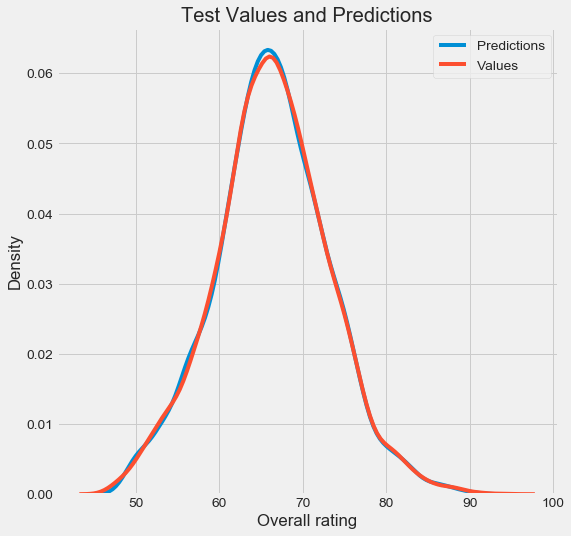

In [96]:
figsize(8, 8)

# Density plot of the final predictions and the test values
sns.kdeplot(final_pred, label = 'Predictions')
sns.kdeplot(y_test, label = 'Values')

# Label the plot
plt.xlabel('Overall rating'); plt.ylabel('Density');
plt.title('Test Values and Predictions');

The distribution looks to be nearly the same. It appears the model is almost accurate at predicting the values.

Another diagnostic plot is a histogram of the residuals. Ideally, we would hope that the residuals are normally distributed, meaning that the model is wrong the same amount in both directions (high and low).

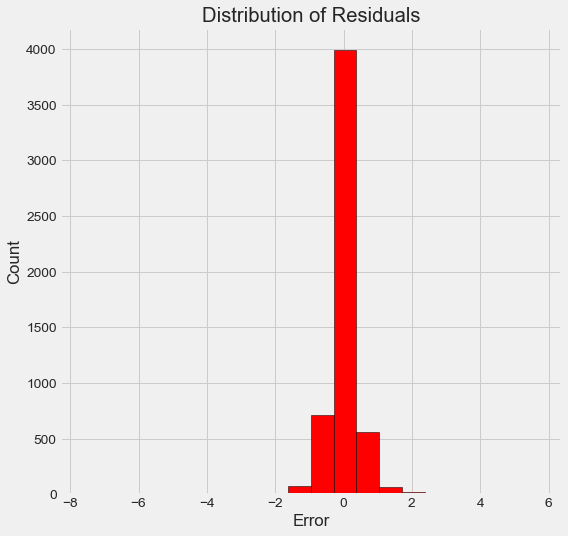

In [97]:
figsize = (6, 6)

# Calculate the residuals 
residuals = final_pred - y_test

# Plot the residuals in a histogram
plt.hist(residuals, color = 'red', bins = 20,
         edgecolor = 'black')
plt.xlabel('Error'); plt.ylabel('Count')
plt.title('Distribution of Residuals');

The residuals are close to normally disributed.

# Interpret the Model

Machine learning is often criticized as being a black-box: we put data in on one side and it gives us the answers on the other. While these answers are often extremely accurate, the model tells us nothing about how it actually made the predictions. This is true to some extent, but there are ways in which we can try and discover how a model "thinks" such as **feature importances**.

## Feature Importances

One of the basic ways we can interpret an ensemble of decision trees is through what are known as the feature importances. These can be interpreted as the variables which are most predictive of the target. While the actual details of the feature importances are quite complex, we can use the relative values to compare the features and determine which are most relevant to our problem.

Extracting the feature importances from a trained ensemble of trees is quite easy in scikit-learn. We will store the feature importances in a dataframe to analyze and visualize them.

In [98]:
# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': list(X_train.columns), 
                                'importance': final_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)

feature_results.head(10)

,feature,importance
0,Value,0.858213
1,Age,0.068664
2,Potential,0.035310
3,Reactions,0.029892
4,Finishing,0.000627
5,Release Clause,0.000488
6,LCB,0.000312
7,GKPositioning,0.000309
8,Position,0.000302
9,SlidingTackle,0.000278


The 'Value' is the single most important feature by quite a large margin. After that, the relative importance drops off considerably which indicates that we might not need to retain all of the features to create a model with nearly the same performance.

Let's graph the feature importances to compare visually.

<Figure size 864x720 with 0 Axes>

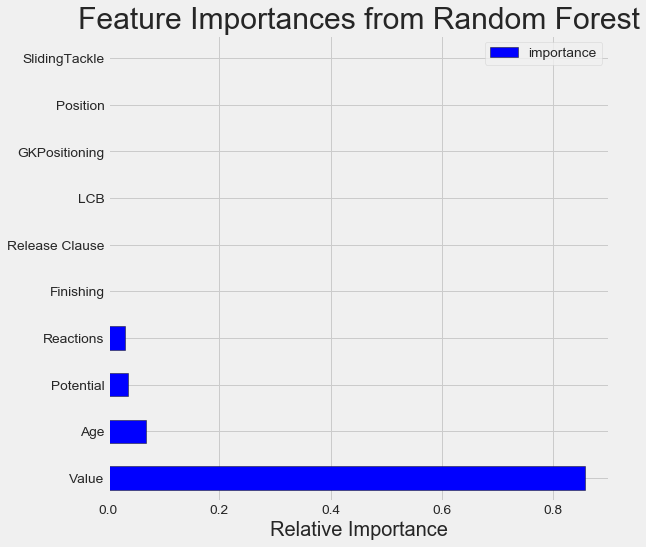

In [99]:
plt.figure(figsize=(12, 10))
plt.style.use('fivethirtyeight')

# Plot the 10 most important features in a horizontal bar chart
feature_results.loc[:9, :].plot(x = 'feature', y = 'importance', 
                                 edgecolor = 'k',
                                 kind='barh', color = 'blue');
plt.xlabel('Relative Importance', size = 20); plt.ylabel('')
plt.title('Feature Importances from Random Forest', size = 30);